In [65]:
import json
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Preparing the symptoms dictionaries

In [66]:
# loading the symptoms dictionaries 

# symptom to symptom category mapping
with open("symptom_category_dict_2.json","r") as f:
    symptom_category_dict = f.read()
# symptom_synonym to symptom category mapping
with open("symptom_synonym_category_dict_2.json","r") as f:
    symptom_synonym_category_dict = f.read()
# the 355 lexicon symptoms
with open("lexicon_symptoms_dict_named.json","r") as f:
    lexicon_symptoms_dict = f.read()

# transforming the read data into Python dictionaries
lexicon_symptoms_dict = ast.literal_eval(lexicon_symptoms_dict)
symptom_synonym_category_dict = ast.literal_eval(symptom_synonym_category_dict)
symptom_category_dict = ast.literal_eval(symptom_category_dict)

In [67]:
# making a symptoms list ordered by the length of the symptom name 
lexicon_symptoms_list = list(lexicon_symptoms_dict.keys())
lexicon_symptoms_df = pd.DataFrame()
lexicon_symptoms_word_count = [len(symptom.split()) for symptom in lexicon_symptoms_list]
lexicon_symptoms_df['lexicon_symptoms'] = lexicon_symptoms_list
lexicon_symptoms_df['word_count'] = lexicon_symptoms_word_count
lexicon_symptoms_df.sort_values('word_count', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
lexicon_symptoms_ordered = lexicon_symptoms_df.lexicon_symptoms.to_list()

In [68]:
# longer symptoms are the first to check to avoid detecting the shorter ones first 
lexicon_symptoms_df

,lexicon_symptoms,word_count
9883,mental and behavioural disorders due to use of...,13
9881,mental and behavioral disorders due to use of ...,13
4166,(examination fear) or (flying phobia) or (stag...,13
9880,mental and behavioral disorders due to use of ...,13
9882,mental and behavioural disorders due to use of...,13
...,...,...
9985,amnesias,1
9989,difficulty;remembering,1
9995,dysmnesia,1
9996,forgetfulness,1


### Extracting the symptoms from the Reddit posts

In [69]:
# loading the reddit posts to analyze
df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv', index_col=0)

C:\Users\hayadi\AppData\Local\Temp\ipykernel_20812\1401673207.py:2: DtypeWarning: Columns (75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reddit_posts_2022_07_21-10_16_58_AM_no_duplicates_personnal_concatenated_clean.csv', index_col=0)


In [70]:
len(df)

20377

In [71]:
csw = ['covid','symptom','like','feel','month','anyone','day','long','back','week','time','start','since','still','think','else','help','know','issue','really','test','experience','better','make','would','work','try','last','cannot','year','could','much','normal','doctor','bad','first','worse','say','felt','post','want','ago','never','something','anything','lot','around','every','almost','away','find','right','life','haul','well','sick','feeling','tell','able','positive','need','hour','happen','good','use','give','longcovid','deal','notice','infection','today','sure','pretty','mild','sometimes','end','way','ever','everything','weird','keep','little','people','problem','new','later','hard','look','nothing','stop','wonder','past','etc','bit','point','though','may','many','fine','hauler','without','cause','maybe','march','severe','leave','hi','always','couple','next','improve','similar','completely','second','everyone','full','health','finally','hope','worst','develop','due','negative','morning','change','mostly','constant','another','struggle','home','recently','suffer','might','anymore','actually','january','put','old','however','level','enough','relate','advice','become','light','stay','already','case','show','different','december','whole','far','clear','diagnose','kind','effect','early','part','believe','daily','supplement','extreme','healthy','result','probably','energy','guy','minute','return','crazy','talk','sense','left','short','someone','catch','story','ask','especially','hit','thought','yet','improvement','sensation','random','super','begin','slowly','april','check','stuff','worry','follow','yesterday','dose','usually','constantly','please','turn','job','extremely','possible','wait','currently','hey','barely','soon','anybody','family','call','great','half','basically','others','fully','longer','system','question','literally','best','horrible','wrong','least','care','appointment','hospital','let','treatment','figure','virus','november','shot','quite','hello','idea','increase','along','either','reason','share','terrible','pass','lh','continue','med','mind','type','medication','sound','mean','heavy','small','intense','decide','except','february','push','friend','prescribe','throughout','include','function','main','course','term','august','guess','late','break','slightly','july','several','flu','manage','within','sort','october','definitely','illness','awful','thanks','mid','trouble','hell','area','strange','shit','pre','moment','everyday','send','condition','general','suddenly','explain','understand','september','prior','remember','concern','initial','june','honestly','curious','often','bring','place','big','doc','twice','beginning','close','saw','describe','eventually','ok','multiple','episode','heal','top','treat','person','although','affect','thank','consider','slight','love','state','disease','male','visit','nearly','answer','worried','diagnosis','real','major','stick','overall','house','sudden','usual','sorry','nervous','medical','realize','mention','linger','progress']

In [72]:
# Extracting the preprocessed posts
preprocessed_reddit_posts = df['long_covid_related_text_unstemmed_without_numbers'].to_list()

from nltk import TweetTokenizer

# Tokenizing the text from the posts (useful for stop words inspection and removal)
tt = TweetTokenizer()
tokenized_posts = [tt.tokenize(post) for post in preprocessed_reddit_posts]
# Flatening the list of tokens to make processing easier
tokenized_posts_flat = [word for post in tokenized_posts for word in post]

import nltk
from nltk.corpus import stopwords

# Defining stopwords removal function
def remove_stopwords(text, stop_words):
    return " ".join([word for word in text if word not in stop_words])

In [73]:
# Extending the stop words list for posts
stop_words = stopwords.words('english')
stop_words.extend(csw)
# Removing the stop words
posts_without_stop_words = [remove_stopwords(post, stop_words) for post in tokenized_posts]
df['long_covid_text_without_stop_words'] = posts_without_stop_words
# Some posts become empty after stop words removal so they filtered out before further processing
non_empty_preprocessed_titled_text_df = df[df['long_covid_text_without_stop_words'].str.len() > 0]
non_empty_posts_without_stop_words = non_empty_preprocessed_titled_text_df['long_covid_text_without_stop_words']

In [74]:
non_empty_posts_without_stop_words

0        gastrointestinal hospitalize confirm align gi ...
1                                                   gotten
2        ejaculate pain radiate body intensely face ent...
4                                          timeline record
5        workout intolerance plenty hear difficulty wor...
                               ...                        
26438    recommendation otc antihistamine fatigue anxie...
26440    trial control antihistamine boost vitamin vita...
26441    suspect 44m 26th dizzy spell heart palpitation...
26442    personally physically limited side dramatic we...
26443    comment wife 10:30 sleep thump head ache enter...
Name: long_covid_text_without_stop_words, Length: 20340, dtype: object

In [75]:
import re
from tqdm.notebook import tqdm

#searching for symptoms in the Reddit posts 
#def symptoms_list(text):
#    symptoms_list = []
#    for symptom in lexicon_symptoms_ordered:
#        if re.search(fr'\b{symptom}\b', text):
           # once a symptom is found, we add it to the list of detected symptoms for the post
#            symptoms_list.append(symptom)
            # then we delete it from the searched post (only during this search, we do not alter the original post)
#            text = re.sub(fr'\b{symptom}\b', '', text)
#    return symptoms_list

#extracted_symptoms = [symptoms_list(text) for text in tqdm(df.long_covid_related_text_unstemmed_without_numbers.to_list())]
#extracted_symptoms = [symptoms_list(text) for text in tqdm(non_empty_posts_without_stop_words)]

In [76]:
# we save the list of lists of extracted symptoms for the posts since the extraction is time consuming
# extracted_symptoms = [list(set(symptoms_list)) for symptoms_list in extracted_symptoms]
# with open("extracted_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms, fp)

In [77]:
# we read the list of extracted symptoms lists from the Reddit posts
with open("extracted_symptoms_from_long_covid_phrases_in_posts", "r") as fp:
    extracted_symptoms = json.load(fp)

In [78]:
other_extracted_symptoms = extracted_symptoms

In [79]:
#other_extracted_symptoms = extracted_symptoms
# we save the list of lists of extracted symptoms for the posts since the extraction is time consuming
#other_extracted_symptoms = [list(set(symptoms_list)) for symptoms_list in other_extracted_symptoms]
#with open("other_extracted_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(other_extracted_symptoms, fp)

In [80]:
extracted_symptoms_lexicon = []
for synonym_list in other_extracted_symptoms:
    lexicon_list = list(set([lexicon_symptoms_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_lexicon.append(lexicon_list)
extracted_symptoms_lexicon

[['gastrointestinal symptom',
  'gastroesophageal reflux',
  'intolerance to food'],
 [],
 ['pain'],
 [],
 ['chest pain', 'palpitations', 'headaches', 'fatigue', 'pain'],
 [],
 [],
 ['hungry', 'weight gain', 'fatigue', 'weight loss'],
 ['fatigue'],
 ['fatigue', 'clouded consciousness'],
 [],
 ['suicidal', 'depression'],
 ['hypesthesia', 'chest pain'],
 ['weakness'],
 ['chills', 'stress'],
 ['fatigue', 'depression', 'dizziness or vertigo', 'clouded consciousness'],
 ['headaches', 'swelling', 'pain', 'myalgia'],
 ['feeling lonely'],
 ['fatigue', 'pain', 'chest pain', 'clouded consciousness'],
 ['cough', 'nasal symptoms'],
 [],
 ['swelling',
  'constipation',
  'temperature intolerance',
  'hot flushes',
  'hair loss',
  'clouded consciousness',
  'dry mouth'],
 ['weight gain'],
 ['palpitations'],
 ['confusion', 'dizziness or vertigo', 'clouded consciousness'],
 ['pain in extremities', 'joint pain', 'pain'],
 ['cold sweat', 'dizziness or vertigo'],
 ['fatigue', 'insomnia', 'edema'],
 ['na

In [81]:
other_extracted_symptoms

[['food intolerance', 'gastrointestinal symptom', 'acid reflux'],
 [],
 ['pain'],
 [],
 ['chest pain', 'fatigue', 'ache', 'palpitation', 'headache'],
 [],
 [],
 ['hungry', 'gain weight', 'tiredness', 'weight loss'],
 ['fatigue'],
 ['brain fog', 'fatigue'],
 [],
 ['suicidal ideation', 'depression anxiety'],
 ['numbness', 'chest pain'],
 ['weak'],
 ['stress', 'chill'],
 ['tired',
  'dizziness',
  'fatigue',
  'brain fog',
  'depression anxiety',
  'depression'],
 ['headache', 'soreness', 'pain', 'swell'],
 ['lonely'],
 ['brain fog', 'heart pain', 'tiredness', 'pain'],
 ['post nasal drip', 'cough'],
 [],
 ['hot flash',
  'dry mouth',
  'constipation',
  'hair loss',
  'swell',
  'brain fog',
  'heat intolerance'],
 ['gain weight'],
 ['palpitation'],
 ['brain fog', 'confusion', 'dizziness'],
 ['shoulder pain', 'arm pain', 'pain'],
 ['dizzy', 'cold sweat'],
 ['insomnia', 'tired', 'edema'],
 ['nausea', 'migraine', 'fatigue', 'suffer'],
 [],
 ['burning sensation', 'cramp', 'vision blurry'],
 

In [82]:
# mapping the extracted symptom synonyms to the symptoms of the lexicon
extracted_symptoms_lexicon = []
for synonym_list in extracted_symptoms:
    lexicon_list = list(set([lexicon_symptoms_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_lexicon.append(lexicon_list)

df['extracted_symptoms_lexicon'] = extracted_symptoms_lexicon
extracted_symptoms_lexicon

[['gastrointestinal symptom',
  'gastroesophageal reflux',
  'intolerance to food'],
 [],
 ['pain'],
 [],
 ['chest pain', 'palpitations', 'headaches', 'fatigue', 'pain'],
 [],
 [],
 ['hungry', 'weight gain', 'fatigue', 'weight loss'],
 ['fatigue'],
 ['fatigue', 'clouded consciousness'],
 [],
 ['suicidal', 'depression'],
 ['hypesthesia', 'chest pain'],
 ['weakness'],
 ['chills', 'stress'],
 ['fatigue', 'depression', 'dizziness or vertigo', 'clouded consciousness'],
 ['headaches', 'swelling', 'pain', 'myalgia'],
 ['feeling lonely'],
 ['fatigue', 'pain', 'chest pain', 'clouded consciousness'],
 ['cough', 'nasal symptoms'],
 [],
 ['swelling',
  'constipation',
  'temperature intolerance',
  'hot flushes',
  'hair loss',
  'clouded consciousness',
  'dry mouth'],
 ['weight gain'],
 ['palpitations'],
 ['confusion', 'dizziness or vertigo', 'clouded consciousness'],
 ['pain in extremities', 'joint pain', 'pain'],
 ['cold sweat', 'dizziness or vertigo'],
 ['fatigue', 'insomnia', 'edema'],
 ['na

In [83]:
# we save the list of lists of extracted lexicon symptoms for the posts
#with open("extracted_lexicon_symptoms_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms_lexicon, fp)

In [84]:
print('Number of posts:', str(len(extracted_symptoms_lexicon)))
print('Number of posts containing at least one symptom:', str(len([l for l in  extracted_symptoms_lexicon if l])))
print('Number of posts containing more than one symptom:', str(len([l for l in  extracted_symptoms_lexicon if len(l)>1])))

Number of posts: 20377
Number of posts containing at least one symptom: 16038
Number of posts containing more than one symptom: 11392


In [85]:
print('Number of posts:', str(len(extracted_symptoms_lexicon)))
print('Number of posts containing at least one symptom:', str(len([l for l in  extracted_symptoms_lexicon if l])))
print('Number of posts containing more than one symptom:', str(len([l for l in  extracted_symptoms_lexicon if len(l)>1])))

Number of posts: 20377
Number of posts containing at least one symptom: 16038
Number of posts containing more than one symptom: 11392


In [86]:
# mapping the symptoms of the lexicon to the categories
extracted_symptoms_categories = []
for synonym_list in other_extracted_symptoms:
    lexicon_list = list(set([symptom_synonym_category_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_categories.append(lexicon_list)
extracted_symptoms_categories

[['Gastrointestinal'],
 [],
 ['Body Pain/Mobility'],
 [],
 ['Neurological/Ocular ',
  'Body Pain/Mobility',
  'General',
  'Cardiorespiratory'],
 [],
 [],
 ['General'],
 ['General'],
 ['Neurological/Ocular ', 'General'],
 [],
 ['Mental Health/Psychological/Behavioral'],
 ['Neurological/Ocular ', 'Cardiorespiratory'],
 ['General'],
 ['Mental Health/Psychological/Behavioral', 'General'],
 ['Neurological/Ocular ', 'Mental Health/Psychological/Behavioral', 'General'],
 ['Body Pain/Mobility', 'Neurological/Ocular ', 'Vascular/Lymphatic'],
 ['Mental Health/Psychological/Behavioral'],
 ['Body Pain/Mobility',
  'Neurological/Ocular ',
  'Cardiorespiratory',
  'General'],
 ['Cardiorespiratory', 'Otorhinolaryngology'],
 [],
 ['Gastrointestinal',
  'Neurological/Ocular ',
  'Otorhinolaryngology',
  'General',
  'Cutaneous',
  'Vascular/Lymphatic'],
 ['General'],
 ['Cardiorespiratory'],
 ['Neurological/Ocular '],
 ['Body Pain/Mobility'],
 ['Neurological/Ocular ', 'General'],
 ['Vascular/Lymphatic'

In [87]:
# mapping the symptoms of the lexicon to the categories
extracted_symptoms_categories = []
for synonym_list in extracted_symptoms:
    lexicon_list = list(set([symptom_synonym_category_dict[synonym] for synonym in synonym_list]))
    extracted_symptoms_categories.append(lexicon_list)

df['extracted_symptoms_categories'] = extracted_symptoms_categories
extracted_symptoms_categories

[['Gastrointestinal'],
 [],
 ['Body Pain/Mobility'],
 [],
 ['Neurological/Ocular ',
  'Body Pain/Mobility',
  'General',
  'Cardiorespiratory'],
 [],
 [],
 ['General'],
 ['General'],
 ['Neurological/Ocular ', 'General'],
 [],
 ['Mental Health/Psychological/Behavioral'],
 ['Neurological/Ocular ', 'Cardiorespiratory'],
 ['General'],
 ['Mental Health/Psychological/Behavioral', 'General'],
 ['Neurological/Ocular ', 'Mental Health/Psychological/Behavioral', 'General'],
 ['Body Pain/Mobility', 'Neurological/Ocular ', 'Vascular/Lymphatic'],
 ['Mental Health/Psychological/Behavioral'],
 ['Body Pain/Mobility',
  'Neurological/Ocular ',
  'Cardiorespiratory',
  'General'],
 ['Cardiorespiratory', 'Otorhinolaryngology'],
 [],
 ['Gastrointestinal',
  'Neurological/Ocular ',
  'Otorhinolaryngology',
  'General',
  'Cutaneous',
  'Vascular/Lymphatic'],
 ['General'],
 ['Cardiorespiratory'],
 ['Neurological/Ocular '],
 ['Body Pain/Mobility'],
 ['Neurological/Ocular ', 'General'],
 ['Vascular/Lymphatic'

In [88]:
# we save the list of lists of extracted symptoms categories for the posts
#with open("extracted_symptoms_categories_from_long_covid_phrases_in_posts", "w") as fp:
#    json.dump(extracted_symptoms_categories, fp)

In [89]:
# flatening the extracted lists 
extracted_symptoms_flat = [word for post in extracted_symptoms for word in post]
extracted_symptoms_lexicon_flat = [symptom for symptom_list in extracted_symptoms_lexicon for symptom in symptom_list]
extracted_symptoms_categories_flat = [category for category_list in extracted_symptoms_categories for category in category_list]

In [90]:
# flatening the extracted lists 
extracted_symptoms_flat = [word for post in extracted_symptoms for word in post]
extracted_symptoms_lexicon_flat = [symptom for symptom_list in extracted_symptoms_lexicon for symptom in symptom_list]
extracted_symptoms_categories_flat = [category for category_list in extracted_symptoms_categories for category in category_list]

### General Results Analysis

#### Most frequent symptoms

In [91]:
import collections

# Most common symptoms from the lexicon
collections.Counter(extracted_symptoms_lexicon_flat).most_common(50)

[('fatigue', 4722),
 ('pain', 3541),
 ('clouded consciousness', 3070),
 ('anxiety', 2839),
 ('headaches', 2506),
 ('dizziness or vertigo', 1990),
 ('palpitations', 1763),
 ('fever', 1555),
 ('chest pain', 1495),
 ('depression', 1303),
 ('cough', 1299),
 ('nausea and/or vomiting', 1070),
 ('myalgia', 1060),
 ('suffering', 1027),
 ('shortness of breath', 1017),
 ('insomnia', 927),
 ('stress', 891),
 ('problem with smell or taste', 837),
 ('weakness', 808),
 ('panic', 806),
 ('joint pain', 648),
 ('pain in throat', 605),
 ('tinnitus', 587),
 ('swelling', 559),
 ('muscle twitching', 534),
 ('gastroesophageal reflux', 530),
 ('chest tightness', 530),
 ('sinonasal congestion', 484),
 ('back pain', 459),
 ('abdominal pain', 438),
 ('diarrhea', 438),
 ('tremor', 391),
 ('chills', 382),
 ('hypesthesia', 362),
 ('sweating', 358),
 ('bronchospasm', 350),
 ('syncope', 334),
 ('pain in extremities', 286),
 ('burning sensation', 285),
 ('itching', 282),
 ('paresthesia', 273),
 ('abnormal breathing',

In [92]:
import collections

# Most common symptoms from the lexicon
collections.Counter(extracted_symptoms_lexicon_flat).most_common(50)

[('fatigue', 4722),
 ('pain', 3541),
 ('clouded consciousness', 3070),
 ('anxiety', 2839),
 ('headaches', 2506),
 ('dizziness or vertigo', 1990),
 ('palpitations', 1763),
 ('fever', 1555),
 ('chest pain', 1495),
 ('depression', 1303),
 ('cough', 1299),
 ('nausea and/or vomiting', 1070),
 ('myalgia', 1060),
 ('suffering', 1027),
 ('shortness of breath', 1017),
 ('insomnia', 927),
 ('stress', 891),
 ('problem with smell or taste', 837),
 ('weakness', 808),
 ('panic', 806),
 ('joint pain', 648),
 ('pain in throat', 605),
 ('tinnitus', 587),
 ('swelling', 559),
 ('muscle twitching', 534),
 ('gastroesophageal reflux', 530),
 ('chest tightness', 530),
 ('sinonasal congestion', 484),
 ('back pain', 459),
 ('abdominal pain', 438),
 ('diarrhea', 438),
 ('tremor', 391),
 ('chills', 382),
 ('hypesthesia', 362),
 ('sweating', 358),
 ('bronchospasm', 350),
 ('syncope', 334),
 ('pain in extremities', 286),
 ('burning sensation', 285),
 ('itching', 282),
 ('paresthesia', 273),
 ('abnormal breathing',

In [93]:
# Counting the occurrences of symptoms 

top_symptoms_number = 30
top_symptoms_count = collections.Counter(extracted_symptoms_lexicon_flat).most_common(top_symptoms_number)
top_symptoms_df = pd.DataFrame([[t[1] for t in top_symptoms_count]], columns=[t[0] for t in top_symptoms_count], index=['occurrence'])
top_symptoms_df

,fatigue,pain,clouded consciousness,anxiety,headaches,dizziness or vertigo,palpitations,fever,chest pain,depression,...,joint pain,pain in throat,tinnitus,swelling,muscle twitching,gastroesophageal reflux,chest tightness,sinonasal congestion,back pain,abdominal pain
occurrence,4722,3541,3070,2839,2506,1990,1763,1555,1495,1303,...,648,605,587,559,534,530,530,484,459,438


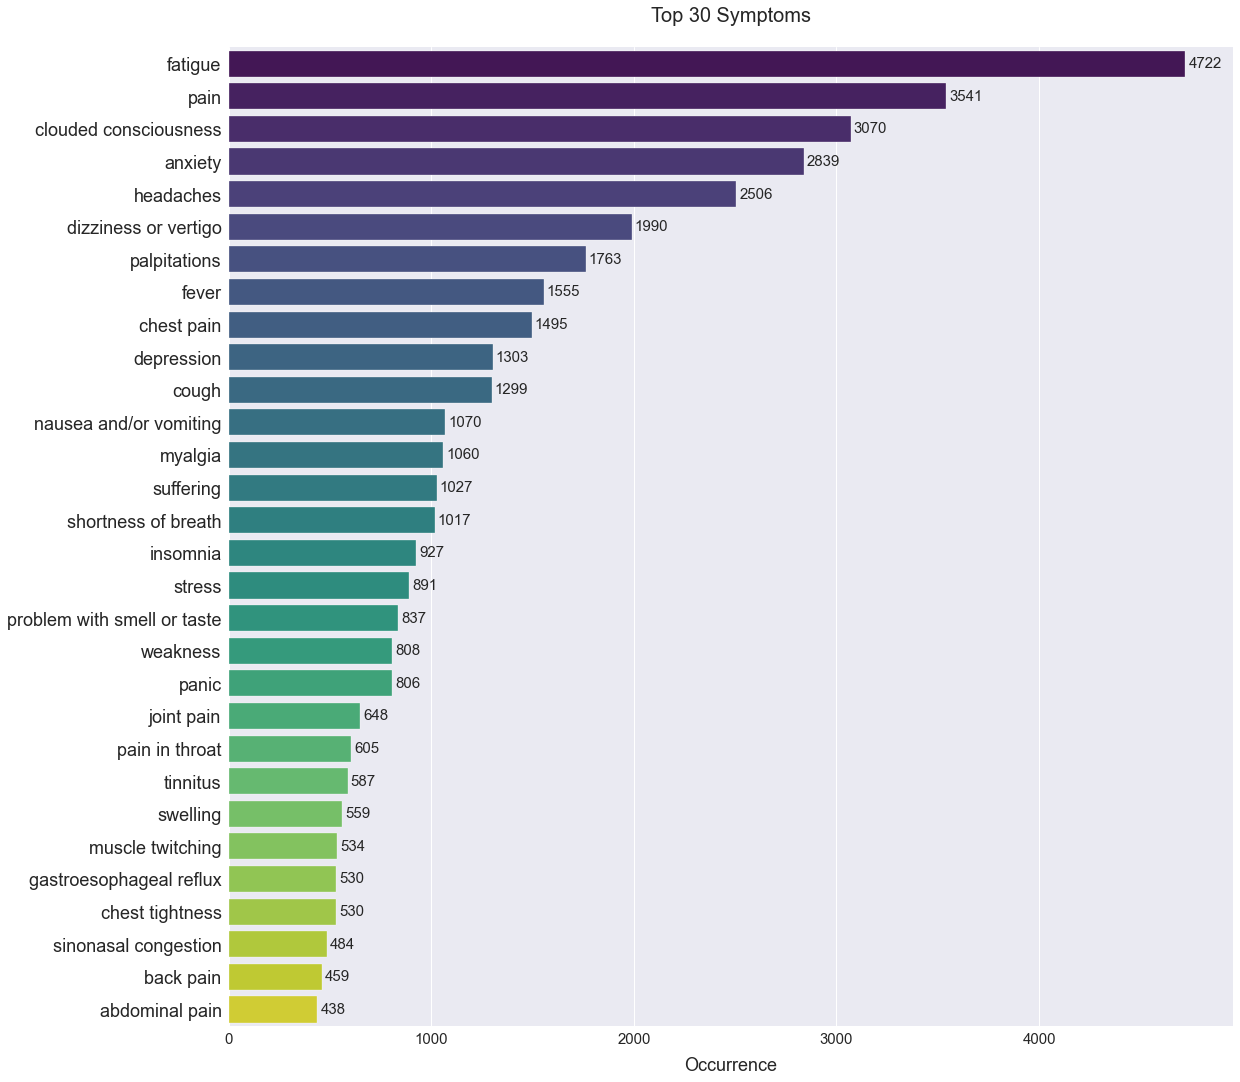

In [94]:
# Plotting the barplot for symptom occurrences

plt.figure(figsize=(18,18))
ax = sns.barplot(data=top_symptoms_df, orient='h', palette='viridis')
plt.title('Top '+ str(top_symptoms_number) +' Symptoms', y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)

#### Most frequent symptom categories

In [95]:
# Counting the occurrences of symptom categories 

top_categories_count = collections.Counter(extracted_symptoms_categories_flat).most_common()
top_categories_df = pd.DataFrame([[t[1] for t in top_categories_count]], columns=[t[0] for t in top_categories_count], index=['occurrence'])
top_categories_df

,General,Neurological/Ocular,Mental Health/Psychological/Behavioral,Body Pain/Mobility,Cardiorespiratory,Otorhinolaryngology,Gastrointestinal,Cutaneous,Sleep,Vascular/Lymphatic,Other Symptoms,Urinary,Women's Health
occurrence,7303,6895,5653,5634,5019,2704,2411,1176,1171,609,110,93,60


In [96]:
top_categories_df.T.sum()

occurrence    38838
dtype: int64

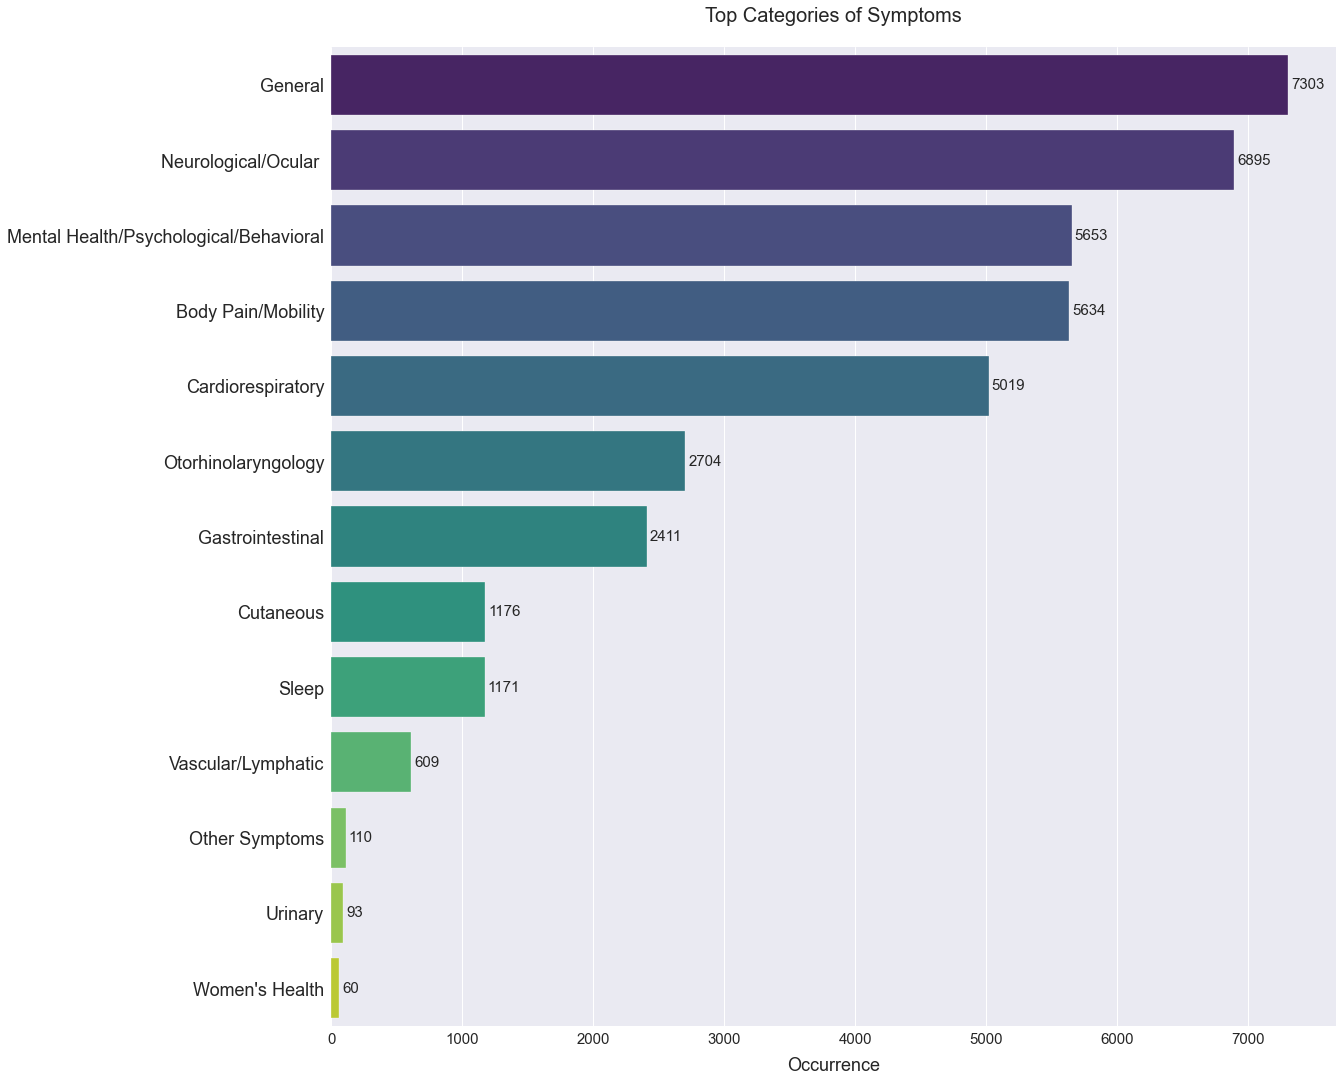

In [97]:
# Plotting the barplot for symptom categories occurrences

fig, ax = plt.subplots(figsize=(18, 18))
ax = sns.barplot(data=top_categories_df, orient='h', palette='viridis')
plt.title("Top Categories of Symptoms", y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)

#### Symptom Categories Co-occurrences

In [98]:
from nltk import bigrams
import itertools

# identifying co-occuring categories in the extracted symptom categories from the Reddit posts
cooccurence_categories = []
for categories_list in extracted_symptoms_categories:
    cooccurence_categories.append([(i,j) for i in categories_list for j in categories_list if i!=j])
cooccurence_categories

[[],
 [],
 [],
 [],
 [('Neurological/Ocular ', 'Body Pain/Mobility'),
  ('Neurological/Ocular ', 'General'),
  ('Neurological/Ocular ', 'Cardiorespiratory'),
  ('Body Pain/Mobility', 'Neurological/Ocular '),
  ('Body Pain/Mobility', 'General'),
  ('Body Pain/Mobility', 'Cardiorespiratory'),
  ('General', 'Neurological/Ocular '),
  ('General', 'Body Pain/Mobility'),
  ('General', 'Cardiorespiratory'),
  ('Cardiorespiratory', 'Neurological/Ocular '),
  ('Cardiorespiratory', 'Body Pain/Mobility'),
  ('Cardiorespiratory', 'General')],
 [],
 [],
 [],
 [],
 [('Neurological/Ocular ', 'General'), ('General', 'Neurological/Ocular ')],
 [],
 [],
 [('Neurological/Ocular ', 'Cardiorespiratory'),
  ('Cardiorespiratory', 'Neurological/Ocular ')],
 [],
 [('Mental Health/Psychological/Behavioral', 'General'),
  ('General', 'Mental Health/Psychological/Behavioral')],
 [('Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'),
  ('Neurological/Ocular ', 'General'),
  ('Mental Health/Psychologi

In [99]:
# counting the co-occurrences of symptom category pairs
bigrams = [category for category_list in cooccurence_categories for category in category_list]
bigram_counts = collections.Counter(bigrams)
bigram_counts_common = bigram_counts.most_common()
bigram_counts_common

[(('Neurological/Ocular ', 'General'), 3748),
 (('General', 'Neurological/Ocular '), 3748),
 (('Body Pain/Mobility', 'General'), 2910),
 (('General', 'Body Pain/Mobility'), 2910),
 (('Neurological/Ocular ', 'Body Pain/Mobility'), 2739),
 (('Body Pain/Mobility', 'Neurological/Ocular '), 2739),
 (('Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'), 2665),
 (('Mental Health/Psychological/Behavioral', 'Neurological/Ocular '), 2665),
 (('General', 'Cardiorespiratory'), 2624),
 (('Cardiorespiratory', 'General'), 2624),
 (('Mental Health/Psychological/Behavioral', 'General'), 2575),
 (('General', 'Mental Health/Psychological/Behavioral'), 2575),
 (('Neurological/Ocular ', 'Cardiorespiratory'), 2278),
 (('Cardiorespiratory', 'Neurological/Ocular '), 2278),
 (('Mental Health/Psychological/Behavioral', 'Cardiorespiratory'), 1990),
 (('Cardiorespiratory', 'Mental Health/Psychological/Behavioral'), 1990),
 (('Mental Health/Psychological/Behavioral', 'Body Pain/Mobility'), 1987),
 ((

In [100]:
# transforming the co-occurrence count into a dictionary
bigram_counts_common_keys = [el[0] for el in bigram_counts_common]
bigram_counts_common_values = [el[1] for el in bigram_counts_common]
bigram_counts_common_dict = {k: v for k, v in zip(bigram_counts_common_keys, bigram_counts_common_values)}
bigram_counts_common_dict

{('Neurological/Ocular ', 'General'): 3748,
 ('General', 'Neurological/Ocular '): 3748,
 ('Body Pain/Mobility', 'General'): 2910,
 ('General', 'Body Pain/Mobility'): 2910,
 ('Neurological/Ocular ', 'Body Pain/Mobility'): 2739,
 ('Body Pain/Mobility', 'Neurological/Ocular '): 2739,
 ('Neurological/Ocular ', 'Mental Health/Psychological/Behavioral'): 2665,
 ('Mental Health/Psychological/Behavioral', 'Neurological/Ocular '): 2665,
 ('General', 'Cardiorespiratory'): 2624,
 ('Cardiorespiratory', 'General'): 2624,
 ('Mental Health/Psychological/Behavioral', 'General'): 2575,
 ('General', 'Mental Health/Psychological/Behavioral'): 2575,
 ('Neurological/Ocular ', 'Cardiorespiratory'): 2278,
 ('Cardiorespiratory', 'Neurological/Ocular '): 2278,
 ('Mental Health/Psychological/Behavioral', 'Cardiorespiratory'): 1990,
 ('Cardiorespiratory', 'Mental Health/Psychological/Behavioral'): 1990,
 ('Mental Health/Psychological/Behavioral', 'Body Pain/Mobility'): 1987,
 ('Body Pain/Mobility', 'Mental Healt

In [101]:
sum(bigram_counts_common_dict.values())/2

47001.0

In [102]:
#original_category_list

In [103]:
# crating a matrix for the co-occurence values
original_category_list = list(set(symptom_synonym_category_dict.values()))
categories_heatmap_df = pd.DataFrame(columns = original_category_list, index = original_category_list, dtype=float)
for category in original_category_list:
    for cat in original_category_list:
        if (category, cat) in bigram_counts_common_dict.keys():
            categories_heatmap_df.loc[category, cat] = bigram_counts_common_dict[(category, cat)]
        elif category != cat:
            categories_heatmap_df.loc[category, cat] = 0
categories_heatmap_df

,Mental Health/Psychological/Behavioral,Gastrointestinal,Body Pain/Mobility,Neurological/Ocular,Otorhinolaryngology,Other Symptoms,General,Cardiorespiratory,Cutaneous,Vascular/Lymphatic,Sleep,Women's Health,Urinary
Mental Health/Psychological/Behavioral,NaN,952.0,1987.0,2665.0,963.0,53.0,2575.0,1990.0,419.0,170.0,577.0,26.0,31.0
Gastrointestinal,952.0,NaN,1124.0,1258.0,588.0,22.0,1384.0,999.0,303.0,120.0,267.0,12.0,26.0
Body Pain/Mobility,1987.0,1124.0,NaN,2739.0,1144.0,52.0,2910.0,1973.0,519.0,329.0,482.0,30.0,52.0
Neurological/Ocular,2665.0,1258.0,2739.0,NaN,1347.0,61.0,3748.0,2278.0,532.0,257.0,647.0,31.0,39.0
Otorhinolaryngology,963.0,588.0,1144.0,1347.0,NaN,31.0,1487.0,1121.0,291.0,140.0,276.0,10.0,26.0
Other Symptoms,53.0,22.0,52.0,61.0,31.0,NaN,67.0,37.0,21.0,4.0,11.0,0.0,1.0
General,2575.0,1384.0,2910.0,3748.0,1487.0,67.0,NaN,2624.0,626.0,289.0,715.0,40.0,48.0
Cardiorespiratory,1990.0,999.0,1973.0,2278.0,1121.0,37.0,2624.0,NaN,410.0,204.0,445.0,23.0,35.0
Cutaneous,419.0,303.0,519.0,532.0,291.0,21.0,626.0,410.0,NaN,132.0,103.0,10.0,10.0
Vascular/Lymphatic,170.0,120.0,329.0,257.0,140.0,4.0,289.0,204.0,132.0,NaN,48.0,6.0,6.0


In [104]:
# crating a matrix for the co-occurence values
original_category_list = list(set(symptom_synonym_category_dict.values()))
categories_heatmap_df = pd.DataFrame(columns = original_category_list, index = original_category_list, dtype=float)
for category in original_category_list:
    for cat in original_category_list:
        if (category, cat) in bigram_counts_common_dict.keys():
            categories_heatmap_df.loc[category, cat] = (bigram_counts_common_dict[(category, cat)] / 38838) * 100
        elif category != cat:
            categories_heatmap_df.loc[category, cat] = 0
categories_heatmap_df

,Mental Health/Psychological/Behavioral,Gastrointestinal,Body Pain/Mobility,Neurological/Ocular,Otorhinolaryngology,Other Symptoms,General,Cardiorespiratory,Cutaneous,Vascular/Lymphatic,Sleep,Women's Health,Urinary
Mental Health/Psychological/Behavioral,NaN,2.451208,5.116123,6.861836,2.479530,0.136464,6.630105,5.123848,1.078840,0.437716,1.485658,0.066945,0.079819
Gastrointestinal,2.451208,NaN,2.894073,3.239096,1.513981,0.056646,3.563520,2.572223,0.780164,0.308976,0.687471,0.030898,0.066945
Body Pain/Mobility,5.116123,2.894073,NaN,7.052371,2.945569,0.133889,7.492662,5.080076,1.336320,0.847109,1.241053,0.077244,0.133889
Neurological/Ocular,6.861836,3.239096,7.052371,NaN,3.468253,0.157063,9.650342,5.865390,1.369792,0.661723,1.665894,0.079819,0.100417
Otorhinolaryngology,2.479530,1.513981,2.945569,3.468253,NaN,0.079819,3.828724,2.886348,0.749266,0.360472,0.710644,0.025748,0.066945
Other Symptoms,0.136464,0.056646,0.133889,0.157063,0.079819,NaN,0.172511,0.095268,0.054071,0.010299,0.028323,0.000000,0.002575
General,6.630105,3.563520,7.492662,9.650342,3.828724,0.172511,NaN,6.756270,1.611823,0.744117,1.840980,0.102992,0.123590
Cardiorespiratory,5.123848,2.572223,5.080076,5.865390,2.886348,0.095268,6.756270,NaN,1.055667,0.525259,1.145785,0.059220,0.090118
Cutaneous,1.078840,0.780164,1.336320,1.369792,0.749266,0.054071,1.611823,1.055667,NaN,0.339873,0.265204,0.025748,0.025748
Vascular/Lymphatic,0.437716,0.308976,0.847109,0.661723,0.360472,0.010299,0.744117,0.525259,0.339873,NaN,0.123590,0.015449,0.015449


In [105]:
categories_heatmap_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Mental Health/Psychological/Behavioral to Urinary
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Mental Health/Psychological/Behavioral  12 non-null     float64
 1   Gastrointestinal                        12 non-null     float64
 2   Body Pain/Mobility                      12 non-null     float64
 3   Neurological/Ocular                     12 non-null     float64
 4   Otorhinolaryngology                     12 non-null     float64
 5   Other Symptoms                          12 non-null     float64
 6   General                                 12 non-null     float64
 7   Cardiorespiratory                       12 non-null     float64
 8   Cutaneous                               12 non-null     float64
 9   Vascular/Lymphatic                      12 non-null     float64
 10  Sleep                      

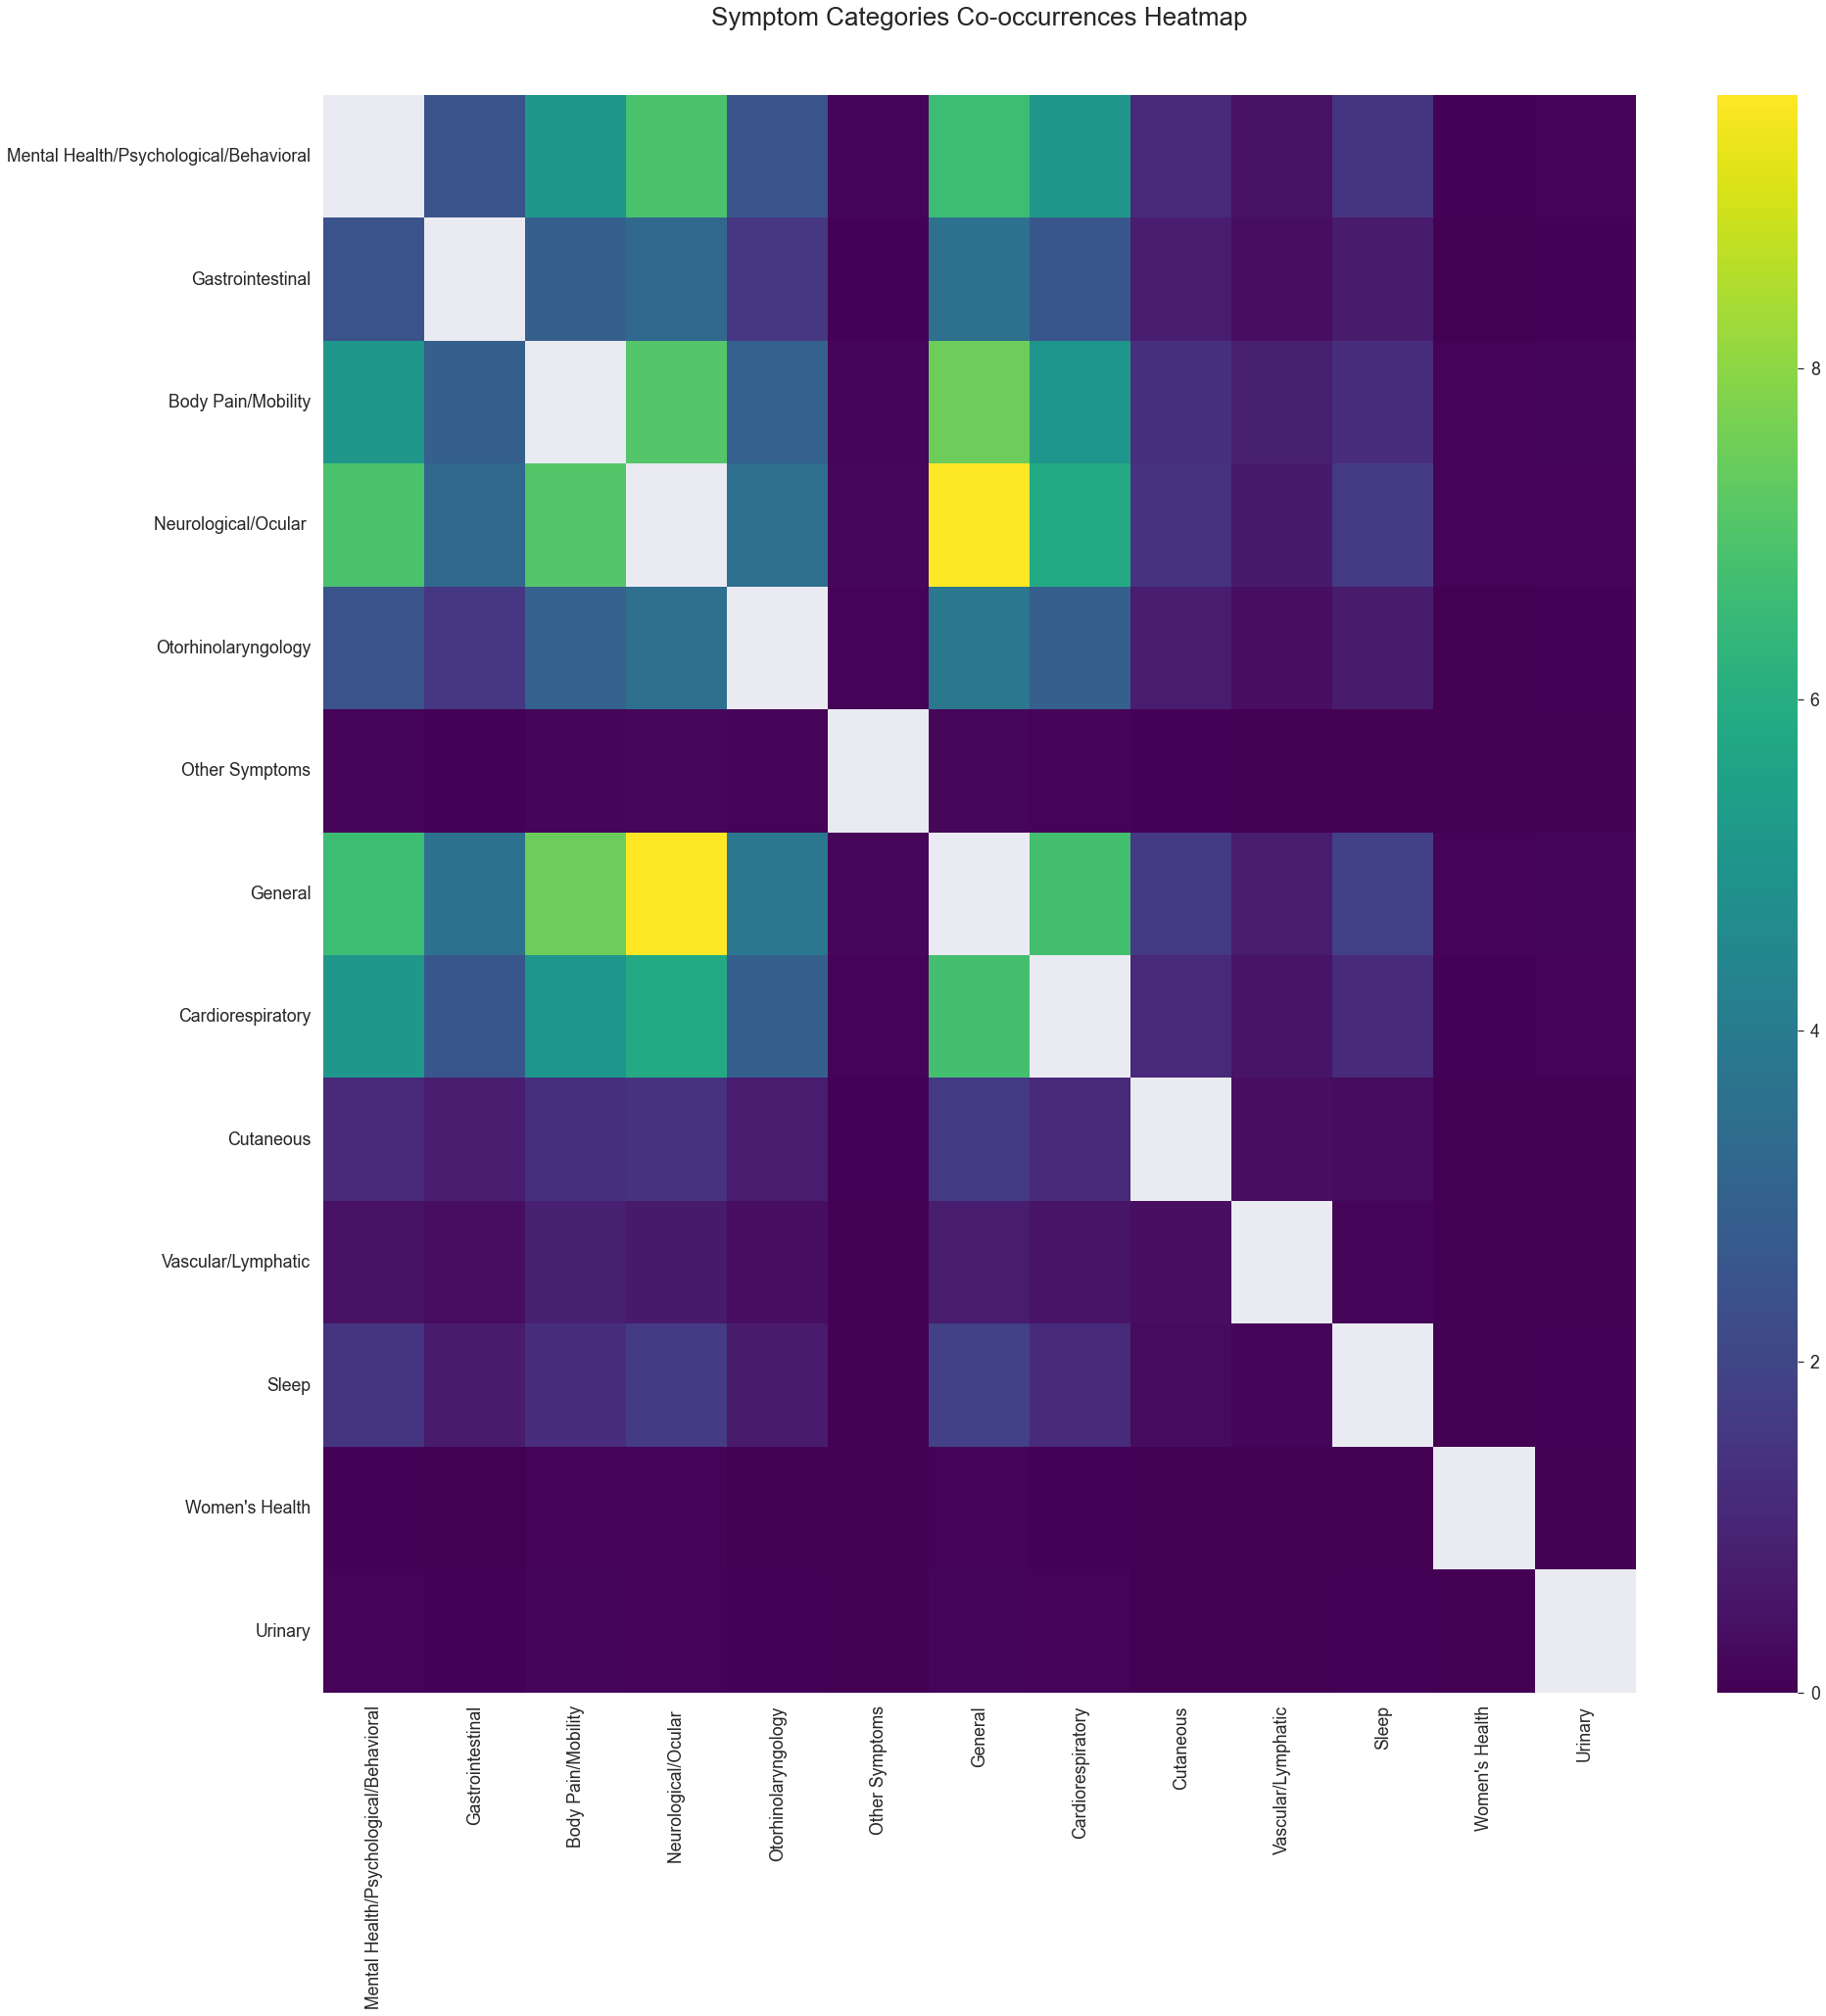

In [106]:
# plotting the co-occurrence matrix
from matplotlib.colors import LogNorm, Normalize

sns.set(font_scale=1.6)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis')
plt.title("Symptom Categories Co-occurrences Heatmap", fontsize=26,  y=1.04)
plt.show()

In [107]:
top_categories_df.columns.to_list()

['General',
 'Neurological/Ocular ',
 'Mental Health/Psychological/Behavioral',
 'Body Pain/Mobility',
 'Cardiorespiratory',
 'Otorhinolaryngology',
 'Gastrointestinal',
 'Cutaneous',
 'Sleep',
 'Vascular/Lymphatic',
 'Other Symptoms',
 'Urinary',
 "Women's Health"]

In [108]:
# crating a matrix for the co-occurence values
original_category_list = top_categories_df.columns.to_list()
categories_heatmap_df = pd.DataFrame(columns = original_category_list, index = original_category_list, dtype=float)
max_value = max(bigram_counts_common_dict.values())
min_value = min(bigram_counts_common_dict.values())

for category in original_category_list:
    for cat in original_category_list:
        if (category, cat) in bigram_counts_common_dict.keys():
            categories_heatmap_df.loc[category, cat] = (bigram_counts_common_dict[(category, cat)] / 38838) * 100
        elif category != cat:
            categories_heatmap_df.loc[category, cat] = (min_value / 38838) / 1.1
        #elif category == cat:
        #    categories_heatmap_df.loc[category, cat] = (max_value / 47001) * 1.1
categories_heatmap_df

,General,Neurological/Ocular,Mental Health/Psychological/Behavioral,Body Pain/Mobility,Cardiorespiratory,Otorhinolaryngology,Gastrointestinal,Cutaneous,Sleep,Vascular/Lymphatic,Other Symptoms,Urinary,Women's Health
General,NaN,9.650342,6.630105,7.492662,6.756270,3.828724,3.563520,1.611823,1.840980,0.744117,0.172511,0.123590,0.102992
Neurological/Ocular,9.650342,NaN,6.861836,7.052371,5.865390,3.468253,3.239096,1.369792,1.665894,0.661723,0.157063,0.100417,0.079819
Mental Health/Psychological/Behavioral,6.630105,6.861836,NaN,5.116123,5.123848,2.479530,2.451208,1.078840,1.485658,0.437716,0.136464,0.079819,0.066945
Body Pain/Mobility,7.492662,7.052371,5.116123,NaN,5.080076,2.945569,2.894073,1.336320,1.241053,0.847109,0.133889,0.133889,0.077244
Cardiorespiratory,6.756270,5.865390,5.123848,5.080076,NaN,2.886348,2.572223,1.055667,1.145785,0.525259,0.095268,0.090118,0.059220
Otorhinolaryngology,3.828724,3.468253,2.479530,2.945569,2.886348,NaN,1.513981,0.749266,0.710644,0.360472,0.079819,0.066945,0.025748
Gastrointestinal,3.563520,3.239096,2.451208,2.894073,2.572223,1.513981,NaN,0.780164,0.687471,0.308976,0.056646,0.066945,0.030898
Cutaneous,1.611823,1.369792,1.078840,1.336320,1.055667,0.749266,0.780164,NaN,0.265204,0.339873,0.054071,0.025748,0.025748
Sleep,1.840980,1.665894,1.485658,1.241053,1.145785,0.710644,0.687471,0.265204,NaN,0.123590,0.028323,0.038622,0.020598
Vascular/Lymphatic,0.744117,0.661723,0.437716,0.847109,0.525259,0.360472,0.308976,0.339873,0.123590,NaN,0.010299,0.015449,0.015449


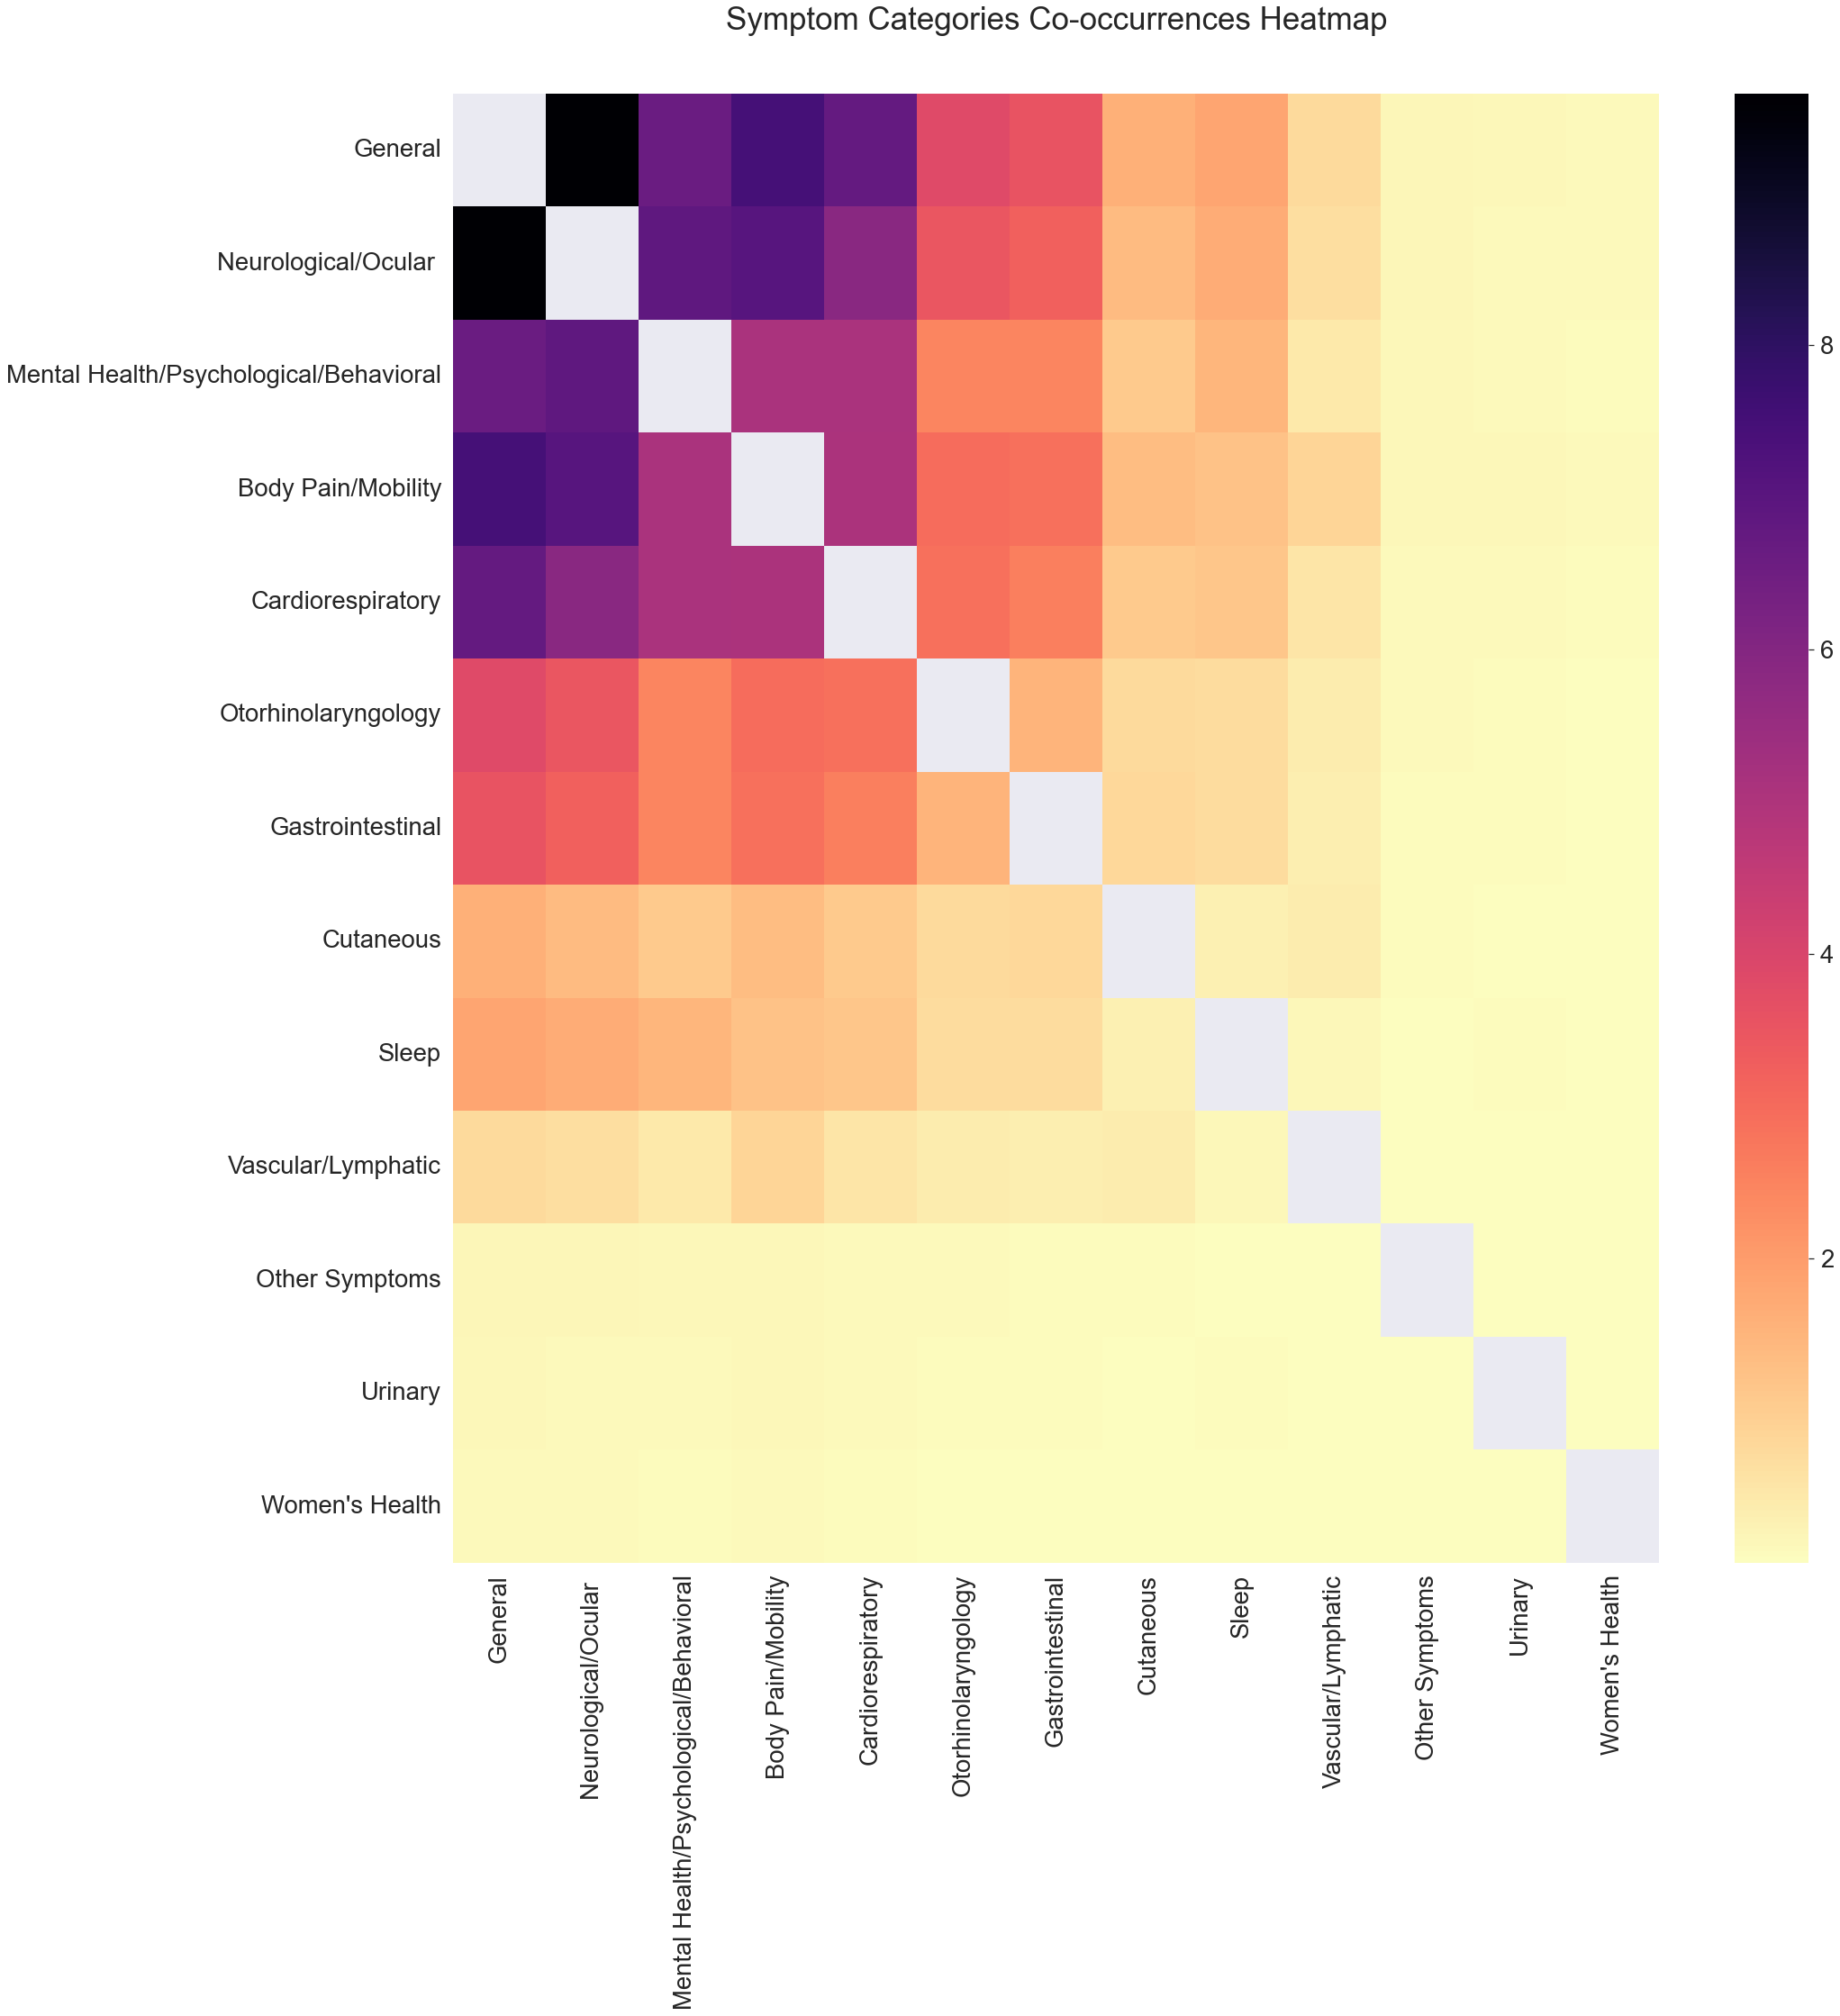

In [109]:
from matplotlib.colors import LogNorm, Normalize

# plotting the co-occurrence matrix
sns.set(font_scale=2.5)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis_r', norm=LogNorm())
heat_map = sns.heatmap(categories_heatmap_df, cmap='magma_r')
plt.title("Symptom Categories Co-occurrences Heatmap", fontsize=35,  y=1.04)
plt.show()

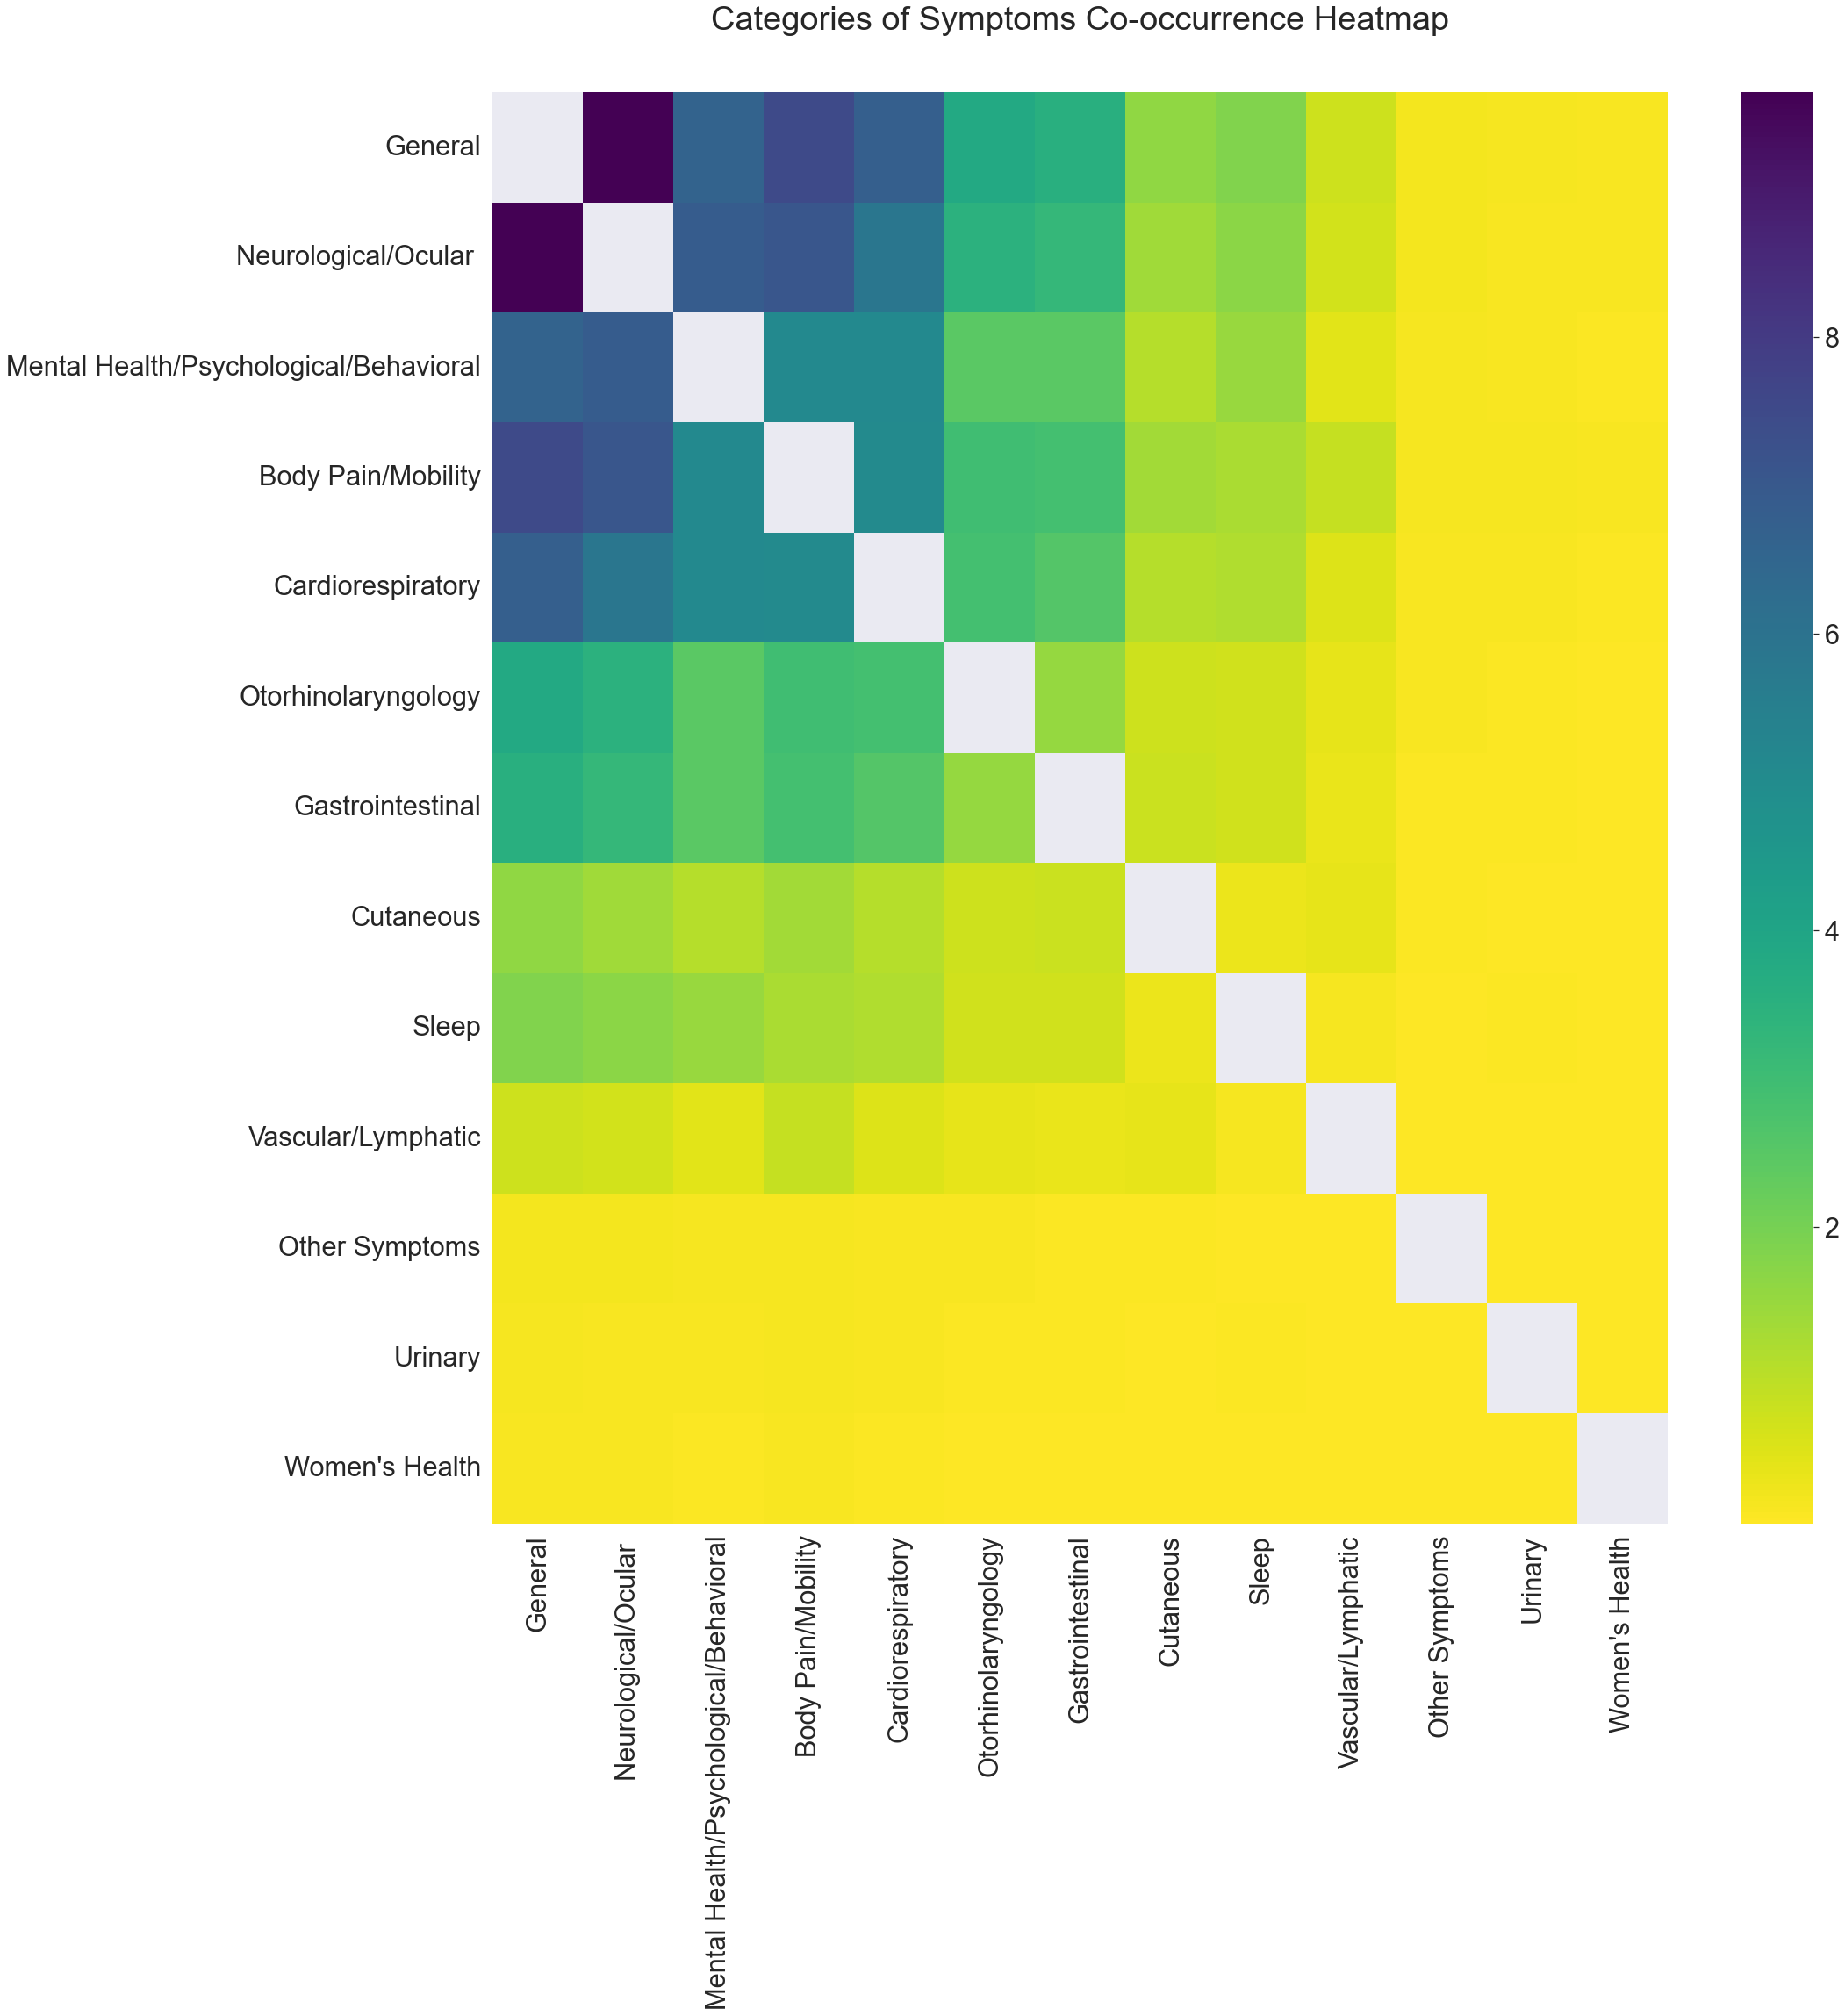

In [110]:
from matplotlib.colors import LogNorm, Normalize

# plotting the co-occurrence matrix
sns.set(font_scale=2.8)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis_r', norm=LogNorm())
heat_map = sns.heatmap(categories_heatmap_df, cmap='viridis_r')

plt.title("Categories of Symptoms Co-occurrence Heatmap", fontsize=38,  y=1.04)
plt.show()

#### Symptoms Co-occurrences

In [116]:
top_symptoms_count

[('fatigue', 4722),
 ('pain', 3541),
 ('clouded consciousness', 3070),
 ('anxiety', 2839),
 ('headaches', 2506),
 ('dizziness or vertigo', 1990),
 ('palpitations', 1763),
 ('fever', 1555),
 ('chest pain', 1495),
 ('depression', 1303),
 ('cough', 1299),
 ('nausea and/or vomiting', 1070),
 ('myalgia', 1060),
 ('suffering', 1027),
 ('shortness of breath', 1017),
 ('insomnia', 927),
 ('stress', 891),
 ('problem with smell or taste', 837),
 ('weakness', 808),
 ('panic', 806),
 ('joint pain', 648),
 ('pain in throat', 605),
 ('tinnitus', 587),
 ('swelling', 559),
 ('muscle twitching', 534),
 ('gastroesophageal reflux', 530),
 ('chest tightness', 530),
 ('sinonasal congestion', 484),
 ('back pain', 459),
 ('abdominal pain', 438)]

In [117]:
top_symptoms_df.T.sum()

occurrence    39900
dtype: int64

In [118]:
# identifying co-occurring symptoms in the extracted symptoms from the Reddit posts

cooccurence_symptoms_lexicon = []
for symptoms_list in extracted_symptoms_lexicon:
    cooccurence_symptoms_lexicon.append([(i,j) for i in symptoms_list for j in symptoms_list if i!=j])
cooccurence_symptoms_lexicon

[[('gastrointestinal symptom', 'gastroesophageal reflux'),
  ('gastrointestinal symptom', 'intolerance to food'),
  ('gastroesophageal reflux', 'gastrointestinal symptom'),
  ('gastroesophageal reflux', 'intolerance to food'),
  ('intolerance to food', 'gastrointestinal symptom'),
  ('intolerance to food', 'gastroesophageal reflux')],
 [],
 [],
 [],
 [('chest pain', 'palpitations'),
  ('chest pain', 'headaches'),
  ('chest pain', 'fatigue'),
  ('chest pain', 'pain'),
  ('palpitations', 'chest pain'),
  ('palpitations', 'headaches'),
  ('palpitations', 'fatigue'),
  ('palpitations', 'pain'),
  ('headaches', 'chest pain'),
  ('headaches', 'palpitations'),
  ('headaches', 'fatigue'),
  ('headaches', 'pain'),
  ('fatigue', 'chest pain'),
  ('fatigue', 'palpitations'),
  ('fatigue', 'headaches'),
  ('fatigue', 'pain'),
  ('pain', 'chest pain'),
  ('pain', 'palpitations'),
  ('pain', 'headaches'),
  ('pain', 'fatigue')],
 [],
 [],
 [('hungry', 'weight gain'),
  ('hungry', 'fatigue'),
  ('hun

In [119]:
# counting the co-occurrences of symptom pairs

bigrams = [symptom for symptoms_list in cooccurence_symptoms_lexicon for symptom in symptoms_list]
bigram_counts = collections.Counter(bigrams)
bigram_counts_common = bigram_counts.most_common()
bigram_counts_common

[(('fatigue', 'clouded consciousness'), 1534),
 (('clouded consciousness', 'fatigue'), 1534),
 (('fatigue', 'pain'), 1233),
 (('pain', 'fatigue'), 1233),
 (('headaches', 'fatigue'), 1115),
 (('fatigue', 'headaches'), 1115),
 (('headaches', 'pain'), 965),
 (('pain', 'headaches'), 965),
 (('fatigue', 'anxiety'), 938),
 (('anxiety', 'fatigue'), 938),
 (('fatigue', 'dizziness or vertigo'), 795),
 (('dizziness or vertigo', 'fatigue'), 795),
 (('fever', 'fatigue'), 732),
 (('fatigue', 'fever'), 732),
 (('anxiety', 'clouded consciousness'), 721),
 (('clouded consciousness', 'anxiety'), 721),
 (('headaches', 'clouded consciousness'), 695),
 (('clouded consciousness', 'headaches'), 695),
 (('pain', 'clouded consciousness'), 691),
 (('clouded consciousness', 'pain'), 691),
 (('palpitations', 'fatigue'), 660),
 (('fatigue', 'palpitations'), 660),
 (('anxiety', 'pain'), 657),
 (('pain', 'anxiety'), 657),
 (('fever', 'pain'), 633),
 (('pain', 'fever'), 633),
 (('dizziness or vertigo', 'clouded cons

In [120]:
# creating a dictionary of the bigram counts
bigram_counts_common_keys = [el[0] for el in bigram_counts_common]
bigram_counts_common_values = [el[1] for el in bigram_counts_common]
bigram_counts_common_dict = {k: v for k, v in zip(bigram_counts_common_keys, bigram_counts_common_values)}

In [121]:
bigram_counts_common_dict.values()

dict_values([1534, 1534, 1233, 1233, 1115, 1115, 965, 965, 938, 938, 795, 795, 732, 732, 721, 721, 695, 695, 691, 691, 660, 660, 657, 657, 633, 633, 612, 612, 579, 579, 571, 571, 562, 562, 550, 550, 547, 547, 544, 544, 542, 542, 507, 507, 486, 486, 476, 476, 463, 463, 462, 462, 462, 462, 459, 459, 451, 451, 425, 425, 420, 420, 418, 418, 416, 416, 411, 411, 408, 408, 406, 406, 401, 401, 388, 388, 381, 381, 353, 353, 352, 352, 349, 349, 347, 347, 345, 345, 343, 343, 342, 342, 338, 338, 333, 333, 328, 328, 325, 325, 325, 325, 317, 317, 309, 309, 304, 304, 300, 300, 296, 296, 289, 289, 289, 289, 288, 288, 286, 286, 279, 279, 278, 278, 277, 277, 269, 269, 267, 267, 265, 265, 259, 259, 259, 259, 255, 255, 254, 254, 253, 253, 251, 251, 248, 248, 247, 247, 244, 244, 243, 243, 242, 242, 241, 241, 235, 235, 235, 235, 233, 233, 225, 225, 225, 225, 224, 224, 222, 222, 221, 221, 220, 220, 220, 220, 218, 218, 217, 217, 217, 217, 217, 217, 216, 216, 215, 215, 207, 207, 207, 207, 205, 205, 204, 204, 2

In [122]:
sum(bigram_counts_common_dict.values())/2

139290.0

In [126]:
# creating the co-occurrence matrix for the top 30 symptoms
top_symptoms_names = [symptom[0] for symptom in top_symptoms_count]
symptoms_heatmap_df = pd.DataFrame(columns = top_symptoms_names, index = top_symptoms_names, dtype=float)
max_value = max(bigram_counts_common_dict.values())
min_value = max(bigram_counts_common_dict.values())

for symptom in top_symptoms_names:
    for sym in top_symptoms_names:
        if (symptom, sym) in bigram_counts_common_dict.keys():
            symptoms_heatmap_df.loc[symptom, sym] = bigram_counts_common_dict[(symptom, sym)] / 39900 * 100
            #symptoms_heatmap_df.loc[symptom, sym] = bigram_counts_common_dict[(symptom, sym)] / 139290 * 100
        elif symptom != sym:
            symptoms_heatmap_df.loc[symptom, sym] = (min_value/ 39900 * 1.1)
        #elif symptom == sym:
        #    symptoms_heatmap_df.loc[symptom, sym] = max_value*2
symptoms_heatmap_df

,fatigue,pain,clouded consciousness,anxiety,headaches,dizziness or vertigo,palpitations,fever,chest pain,depression,...,joint pain,pain in throat,tinnitus,swelling,muscle twitching,gastroesophageal reflux,chest tightness,sinonasal congestion,back pain,abdominal pain
fatigue,NaN,3.090226,3.844612,2.350877,2.794486,1.992481,1.654135,1.834586,1.408521,1.370927,...,0.741855,0.751880,0.563910,0.411028,0.421053,0.451128,0.551378,0.543860,0.418546,0.403509
pain,3.090226,NaN,1.731830,1.646617,2.418546,1.160401,1.065163,1.586466,1.431078,0.834586,...,0.822055,0.611529,0.320802,0.588972,0.476190,0.423559,0.395990,0.363409,0.674185,0.443609
clouded consciousness,3.844612,1.731830,NaN,1.807018,1.741855,1.533835,1.005013,0.857143,0.724311,1.130326,...,0.433584,0.285714,0.413534,0.210526,0.288221,0.263158,0.280702,0.260652,0.255639,0.255639
anxiety,2.350877,1.646617,1.807018,NaN,1.358396,1.270677,1.363409,0.859649,0.954887,1.047619,...,0.310777,0.305764,0.360902,0.213033,0.345865,0.363409,0.411028,0.218045,0.253133,0.230576
headaches,2.794486,2.418546,1.741855,1.358396,NaN,1.451128,0.864662,1.218045,0.884712,0.669173,...,0.551378,0.543860,0.395990,0.313283,0.335840,0.278195,0.320802,0.423559,0.338346,0.333333
dizziness or vertigo,1.992481,1.160401,1.533835,1.270677,1.451128,NaN,1.042607,0.664160,0.724311,0.511278,...,0.260652,0.238095,0.431078,0.187970,0.223058,0.203008,0.270677,0.213033,0.187970,0.180451
palpitations,1.654135,1.065163,1.005013,1.363409,0.864662,1.042607,NaN,0.561404,1.017544,0.393484,...,0.233083,0.195489,0.263158,0.142857,0.228070,0.268170,0.295739,0.160401,0.180451,0.180451
fever,1.834586,1.586466,0.857143,0.859649,1.218045,0.664160,0.561404,NaN,0.543860,0.388471,...,0.238095,0.503759,0.182957,0.243108,0.145363,0.162907,0.225564,0.358396,0.200501,0.225564
chest pain,1.408521,1.431078,0.724311,0.954887,0.884712,0.724311,1.017544,0.543860,NaN,0.325815,...,0.197995,0.243108,0.120301,0.162907,0.150376,0.223058,0.215539,0.160401,0.268170,0.195489
depression,1.370927,0.834586,1.130326,1.047619,0.669173,0.511278,0.393484,0.388471,0.325815,NaN,...,0.137845,0.117794,0.182957,0.090226,0.090226,0.097744,0.117794,0.082707,0.107769,0.107769


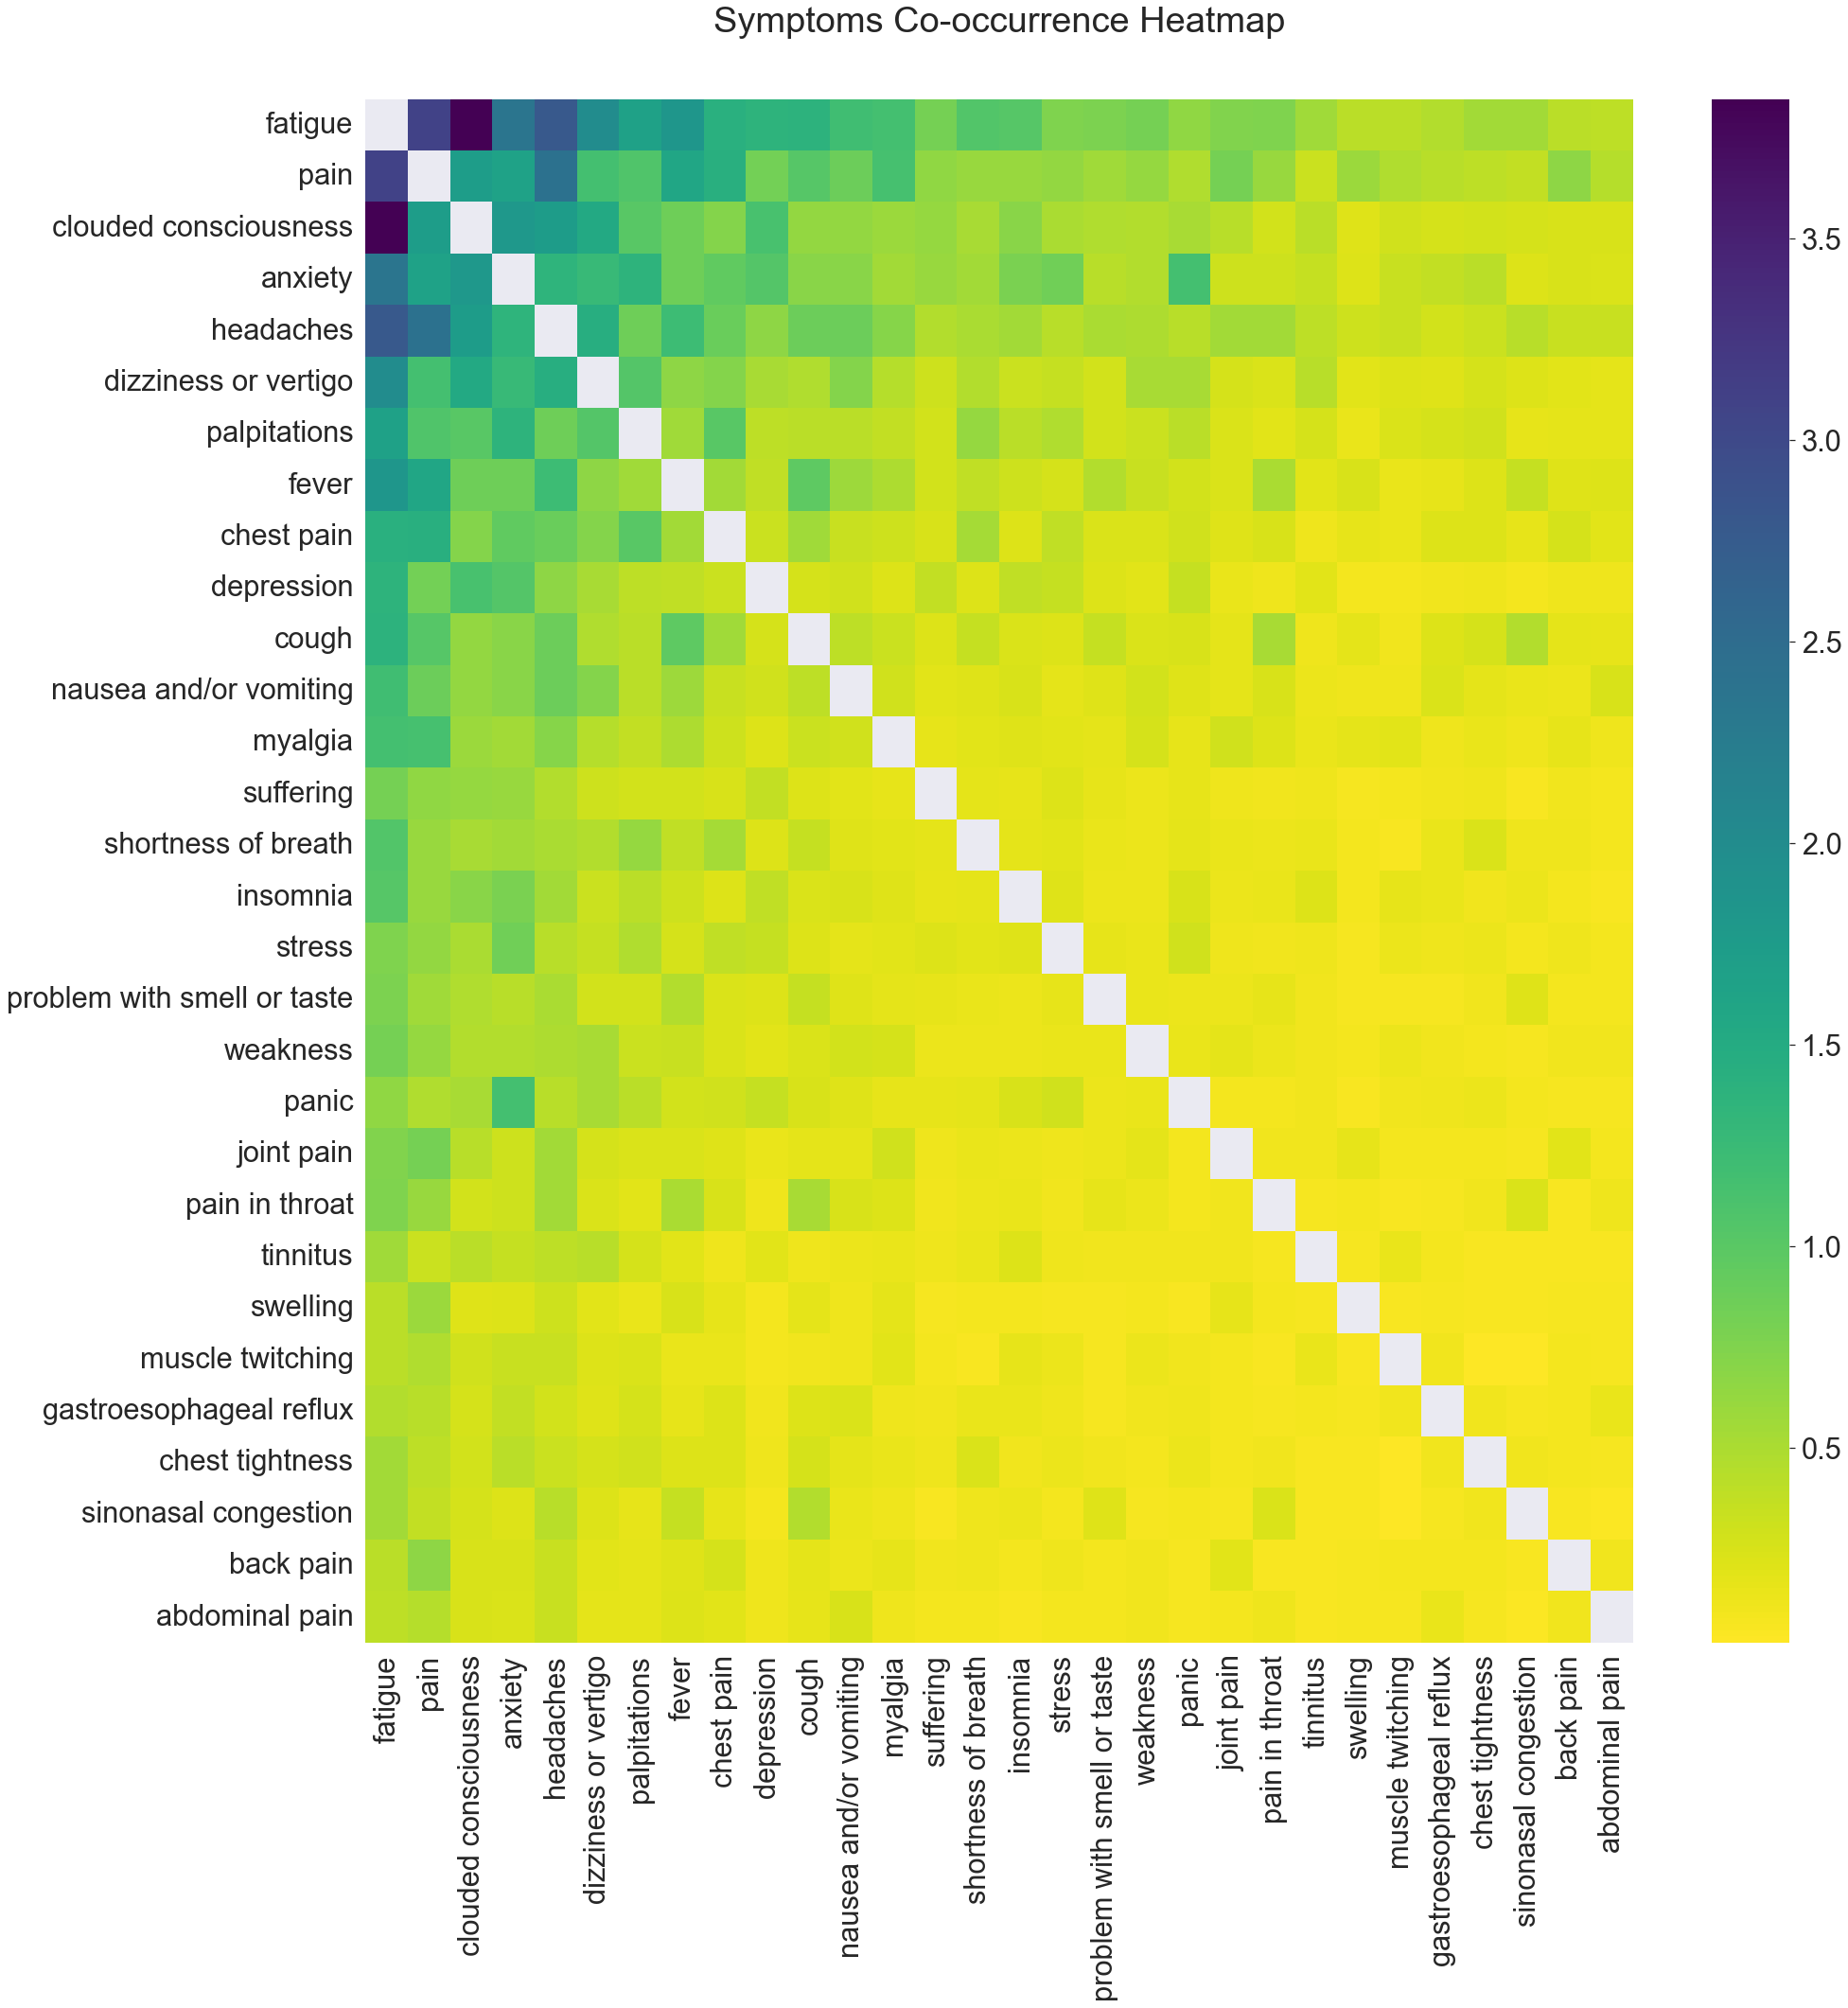

In [127]:
# plotting the heatmap from the matrix

sns.set(font_scale=2.8)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(symptoms_heatmap_df, cmap='rainbow', norm=LogNorm())
heat_map = sns.heatmap(symptoms_heatmap_df, cmap='viridis_r')
plt.title("Symptoms Co-occurrence Heatmap", fontsize=38,  y=1.04)
plt.show()

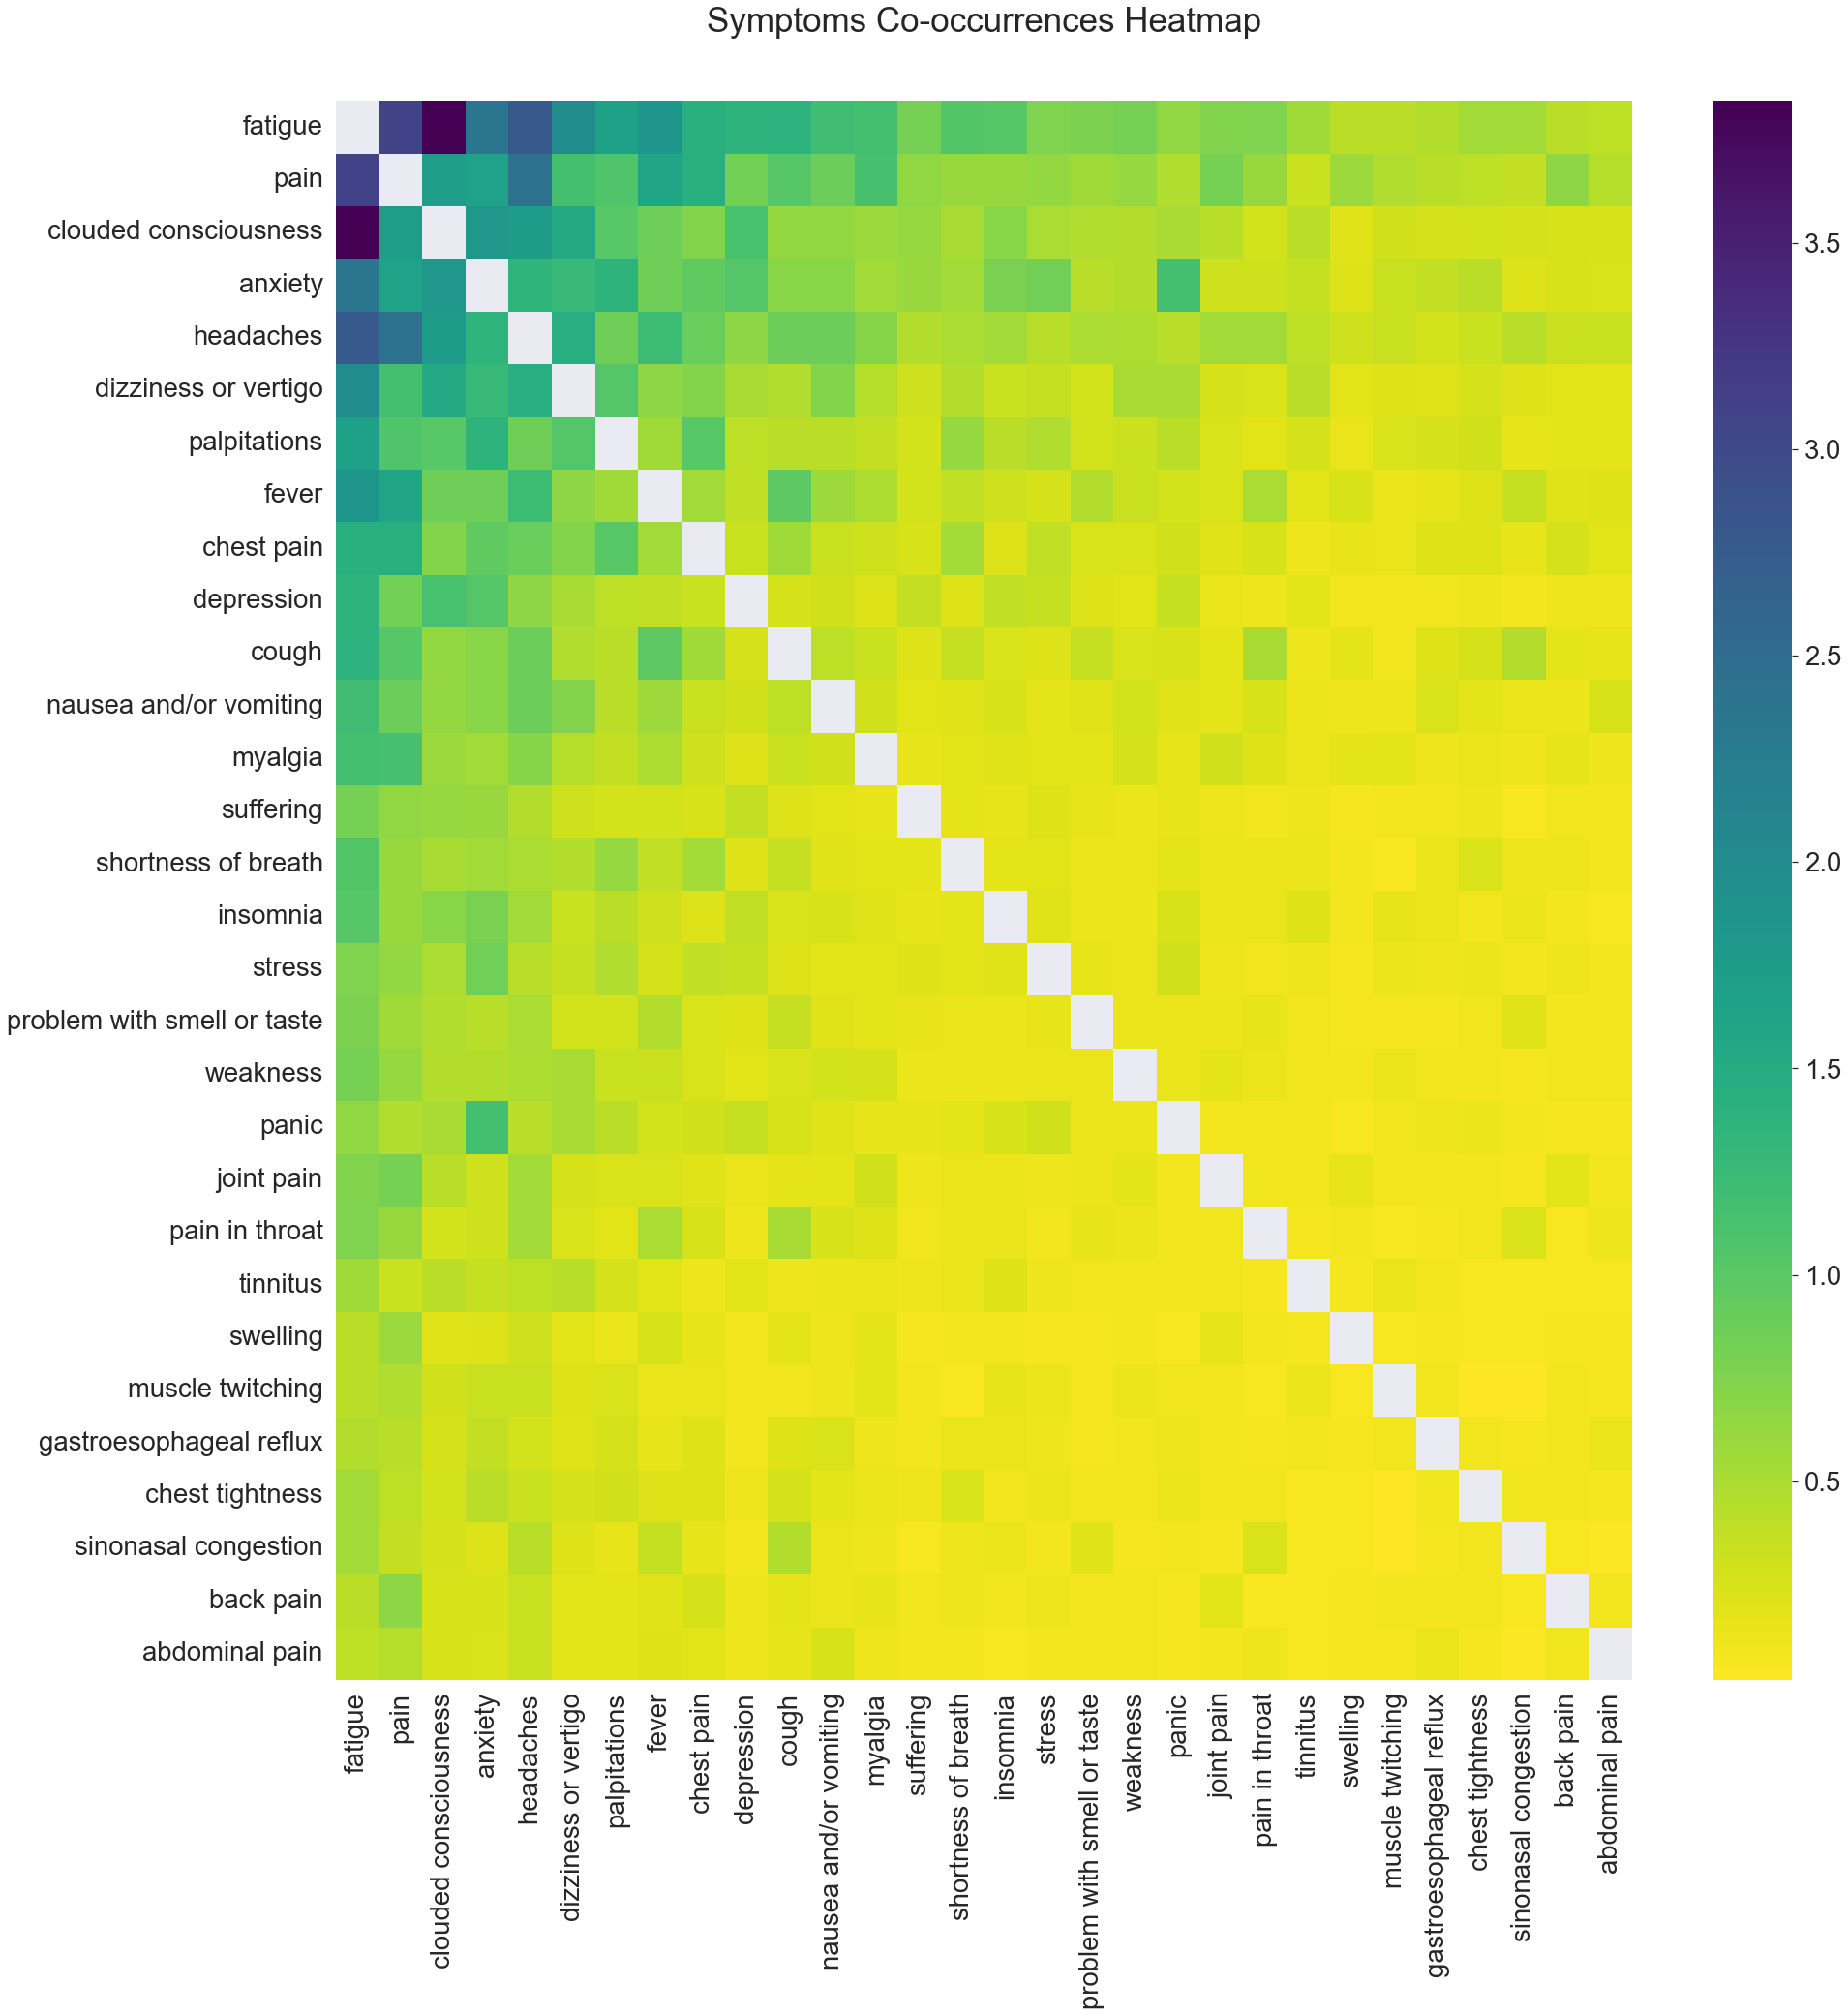

In [128]:
# plotting the heatmap from the matrix

sns.set(font_scale=2.5)
# 3. Plot the heatmap
plt.figure(figsize=(30,30))
#heat_map = sns.heatmap(symptoms_heatmap_df, cmap='rainbow', norm=LogNorm())
heat_map = sns.heatmap(symptoms_heatmap_df, cmap='viridis_r')
plt.title("Symptoms Co-occurrences Heatmap", fontsize=35,  y=1.04)
plt.show()

### Clustering Results Analysis

In [106]:
# reading clustering results 

categorized_clusters = pd.read_csv('35_clusters_labeled.csv')
clustered_reddit_posts = pd.read_csv('clustered_reddit_posts.csv', index_col=0)
clustered_reddit_posts['category'] = [categorized_clusters.iloc[i]['Symptom Category'] for i in clustered_reddit_posts.cluster.values]

In [107]:
df.columns

Index(['level_0', 'index', '_id', 'all_awardings', 'allow_live_comments',
       'author', 'author_flair_css_class', 'author_flair_richtext',
       'author_flair_text', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_template_id', 'link_flair_text', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'sub

In [108]:
# adding the extracted symptoms and symptom categories columns 

clustered_reddit_posts['extracted_symptoms_lexicon'] = df.loc[clustered_reddit_posts.index]['extracted_symptoms_lexicon']
clustered_reddit_posts['extracted_symptoms_categories'] = df.loc[clustered_reddit_posts.index]['extracted_symptoms_categories']

In [109]:
clustered_reddit_posts

,index,_id,title,selftext,titled_selftext,long_covid_related_text_unstemmed_without_numbers,long_covid_text_without_stop_words,cluster,centroid_distance,category,extracted_symptoms_lexicon,extracted_symptoms_categories
0,0,62d6699037075c826c2d1c0b,Post Covid gastrointestinal symptoms,"I got sick in March 2020, was not hospitalized...",Post Covid gastrointestinal symptoms I got sic...,post covid gastrointestinal symptom sick march...,gastrointestinal hospitalize confirm align gi ...,17,0.996095,Gastrointestinal,"[intolerance to food, gastrointestinal symptom...",[Gastrointestinal]
1,1,62d6699037075c826c2d1c0c,Has anyone gotten worse at 8 months?,Have any of you gotten worse at around 8 months?,Has anyone gotten worse at 8 months? Have any ...,anyone gotten worse month worse around month,gotten,15,1.002629,Mixed,[],[]
2,2,62d6699037075c826c2d1c0d,Bit of an odd sexual question.,"A pretty personal question, but a very strange...",Bit of an odd sexual question. A pretty person...,every time would ejaculate pain would radiate ...,ejaculate pain radiate body intensely face ent...,14,0.989337,General,[pain],[Body Pain/Mobility]
4,4,62d6699037075c826c2d1c0f,Timeline,I looked back at my records since i've been si...,Timeline I looked back at my records since i'v...,timeline look back record since sick august si...,timeline record,15,1.002788,Mixed,[],[]
5,5,62d6699037075c826c2d1c10,Workout Intolerance ?,Plenty of times I’ve heard that us haulers ha...,Workout Intolerance ? Plenty of times I’ve he...,workout intolerance plenty time hear hauler di...,workout intolerance plenty hear difficulty wor...,23,0.933310,Relapse/Recovery,"[headaches, palpitations, pain, fatigue, chest...","[General, Body Pain/Mobility, Cardiorespirator..."
...,...,...,...,...,...,...,...,...,...,...,...,...
26438,27208,62d6bf9037075c826c2d8653,Recommendation for best OTC antihistamine for ...,I'm struggling with fatigue and crazy levels o...,Recommendation for best OTC antihistamine for ...,recommendation best otc antihistamine long cov...,recommendation otc antihistamine fatigue anxie...,15,0.992679,Mixed,"[anxiety, fatigue]","[General, Mental Health/Psychological/Behavioral]"
26440,27210,62d6bf9037075c826c2d8655,Starting a trial,I thought I had my long Covid (since December)...,Starting a trial I thought I had my long Covid...,start trial think long covid since december co...,trial control antihistamine boost vitamin vita...,16,0.971651,Psychological/Behavioral/Mental Health Issues,"[panic, clouded consciousness, pain, fatigue, ...","[General, Neurological/Ocular , Body Pain/Mobi..."
26441,27211,62d6bf9037075c826c2d8656,Suspected long covid,Hi all 44m never tested positive for covid bu...,Suspected long covid Hi all 44m never tested ...,suspect longcovid hi 44m never test positive c...,suspect 44m 26th dizzy spell heart palpitation...,11,0.966621,Cardio-respiratory,"[shortness of breath, chest tightness, palpita...","[Gastrointestinal, Cardiorespiratory, Neurolog..."
26442,27212,62d6bf9037075c826c2d8657,Scottish study looking for participants for re...,This might be useful for anyone struggling wit...,Scottish study looking for participants for re...,personally physically limited medication side ...,personally physically limited side dramatic we...,14,0.982989,General,"[weight gain, joint pain]","[General, Body Pain/Mobility]"


In [110]:
clustered_reddit_posts['category'].unique()

array(['Gastrointestinal', 'Mixed', 'General', 'Relapse/Recovery',
       'Otorhinolaryngological', 'Sleep Disorders',
       'Psychological/Behavioral/Mental Health Issues',
       'Neurological/Ocular', 'Vascular/Lymph Node Issues',
       'Cardio-respiratory', 'Other', 'Vaccine', 'Cutaneous',
       "Women's health"], dtype=object)

In [111]:
# examining each cluster fixed by the cluster number
cluster_number = 15
# creating a sub dataframe with the cluster number 
sub_df = clustered_reddit_posts[clustered_reddit_posts['cluster'] == cluster_number]
sub_df_symptoms = sub_df['extracted_symptoms_lexicon']
sub_df_categories = sub_df['extracted_symptoms_categories']
# identifying the top symptoms for this particular cluster
symptoms_flat = [s for s_list in sub_df_symptoms for s in s_list]
top_symptoms_number = 5
top_symptoms = collections.Counter(symptoms_flat).most_common(top_symptoms_number)
# identifying the top symptom categories for this particular cluster
categories_flat = [c for c_list in sub_df_categories for c in c_list]
top_categories_number = 5
top_categories = collections.Counter(categories_flat).most_common(top_categories_number)

In [112]:
collections.Counter(categories_flat)

Counter({'General': 1357,
         'Mental Health/Psychological/Behavioral': 1566,
         'Gastrointestinal': 464,
         'Neurological/Ocular ': 946,
         'Otorhinolaryngology': 309,
         'Body Pain/Mobility': 718,
         'Cardiorespiratory': 613,
         'Vascular/Lymphatic': 89,
         'Other Symptoms': 38,
         'Sleep': 180,
         'Cutaneous': 216,
         'Urinary': 33,
         "Women's Health": 9})

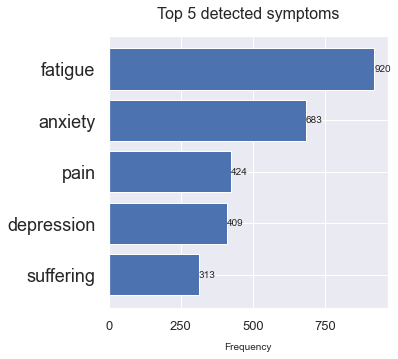

In [48]:
# plotting the top symptoms 
fig, ax = plt.subplots(figsize=(5, 5))
bars = plt.barh(list(reversed([t[0] for t in top_symptoms])), list(reversed([t[1] for t in top_symptoms])))
plt.yticks(fontsize=18)
plt.xticks(fontsize=13)
plt.title("Top " + str(top_symptoms_number) + " detected symptoms", fontsize=16,  y=1.04)
plt.xlabel("Frequency", fontsize=10, labelpad=10)
_ = ax.bar_label(bars, fontsize=10)

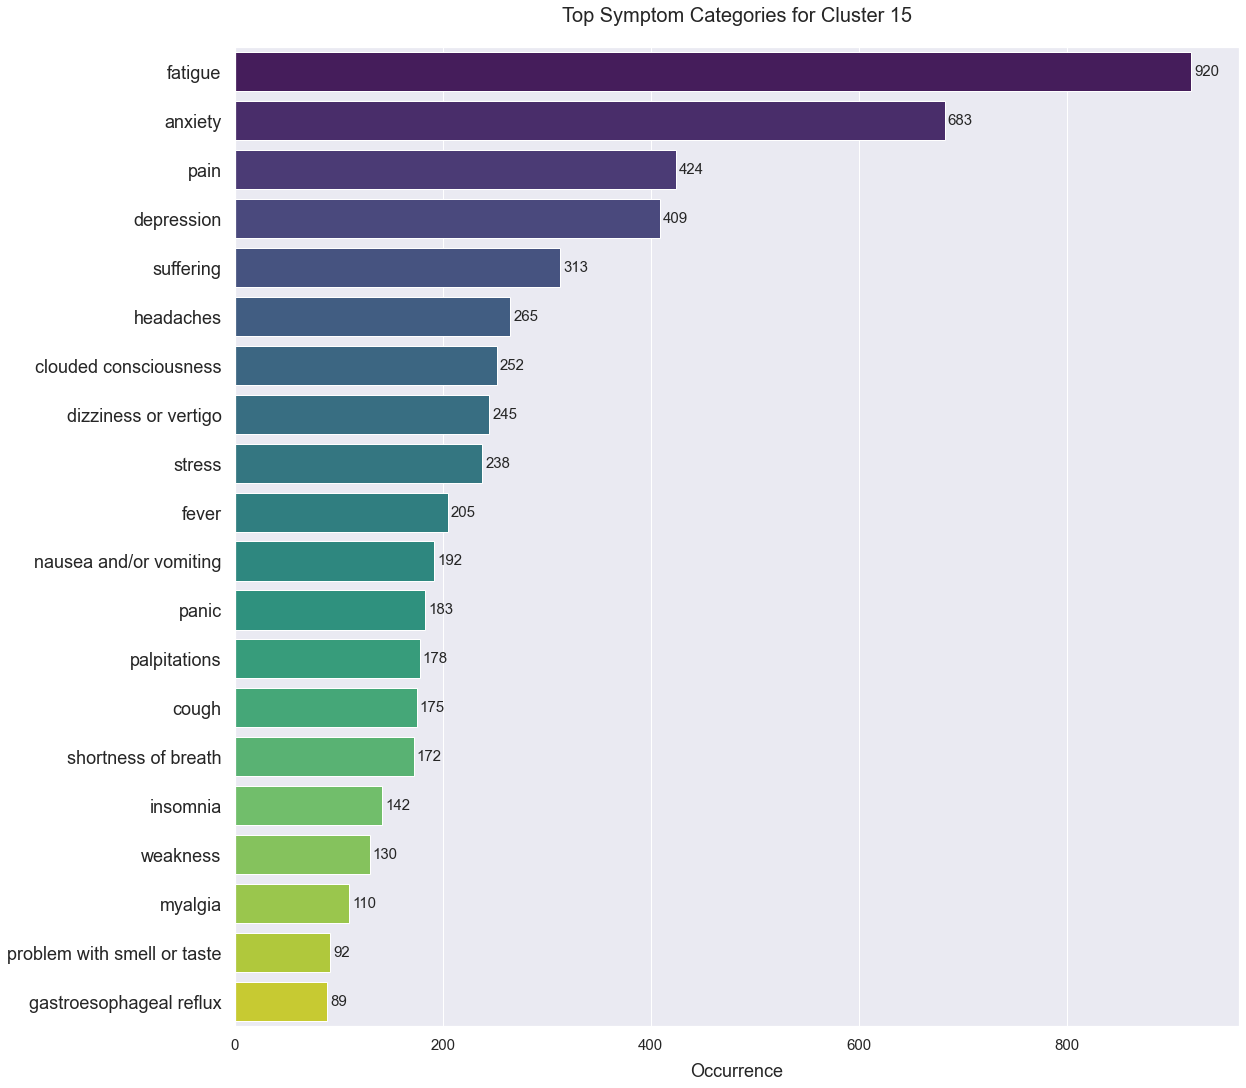

In [49]:
# Counting the occurrences of symptoms

top_symptoms_count = collections.Counter(symptoms_flat).most_common(20)
top_symptoms_df = pd.DataFrame([[t[1] for t in top_symptoms_count]], columns=[t[0] for t in top_symptoms_count], index=['occurrence'])
top_symptoms_df

# Plotting the barplot for symptoms occurrences

fig, ax = plt.subplots(figsize=(18, 18))
ax = sns.barplot(data=top_symptoms_df, orient='h', palette='viridis')
plt.title("Top Symptom Categories for Cluster 15", y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)

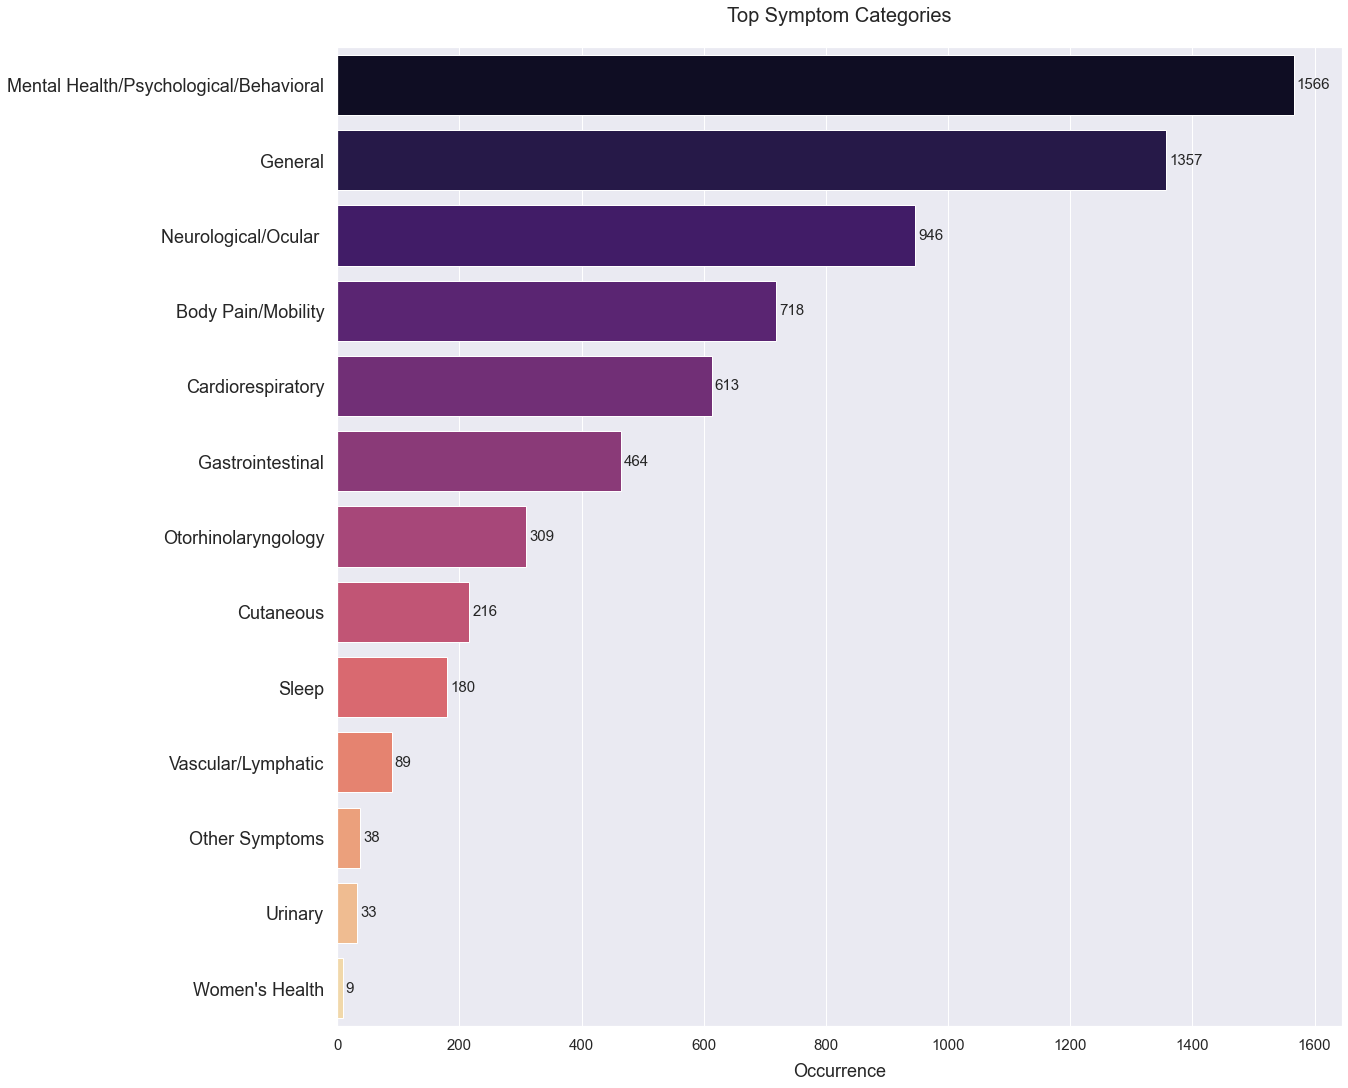

In [50]:
# Counting the occurrences of symptom categories 

top_categories_count = collections.Counter(categories_flat).most_common()
top_categories_df = pd.DataFrame([[t[1] for t in top_categories_count]], columns=[t[0] for t in top_categories_count], index=['occurrence'])
top_categories_df

# Plotting the barplot for symptom categories occurrences

fig, ax = plt.subplots(figsize=(18, 18))
ax = sns.barplot(data=top_categories_df, orient='h', palette='magma')
plt.title("Top Symptom Categories", y= 1.02,  fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.xlabel("Occurrence", fontsize=18, labelpad=10)
_ = ax.bar_label(ax.containers[0], fontsize=15, padding=3)